# Transcriptomics Assignment (Bulk RNA sequencing)
# Dennis Dharmawan - r0911921

### Title
Genome-wide transcriptome analysis of human iPSC-derived healthy control vs schizophrenia developmental glutamatergic neurons (**GEO accession: GSE184102**)
### Organism
*Homo sapiens*
### Summary
The authors' aim is to identify schizophrenia (SCZ) GWAS risk genes that are differentially expressed in developing glutamatergic neurons.
They performed bulk RNA sequencing analysis of healthy control vs schizophrenia developmental glutamatergic neurons, differentiated from 4 healthy control human iPSCs vs 5 schizophrenia human iPSCs.  
From the results in the paper, it is expected to have genes involved in the ion transporter pathway to be downregulated in schizophrenia iPSCs.
For this assignment, I analyzed 3 of the control iPSCs and 3 of the schizophrenia iPSCs
### Reference associated with the data set
Liu D, Zinski A, Mishra A, Noh H et al. **Impact of schizophrenia GWAS loci converge onto distinct pathways in cortical interneurons vs glutamatergic neurons during development.** Mol Psychiatry 2022 Oct;27(10):4218-4233. 

# PART 1: Mapping and counting reads

## Step 0: Set up working directory

In [56]:
mkdir -p /mnt/storage/$USER/jupyternotebooks/transcriptomics_assignment
cd /mnt/storage/$USER/jupyternotebooks/transcriptomics_assignment

## Step 1: Get reads

In [57]:
vdb-config -s /repository/user/cache-disabled=true

### FASTQ files to be downloaded:  
**SRR15893391, SRR15893392, SRR15893393 --> 3 healthy iPSCs  
SRR15893396, SRR15893397, SRR15893398 --> 3 schizophrenia iPSCs**

All the fastq files contain paired reads.

**Download test fastq files:**  
Just for testing purposes to make sure the fastq file download is alright.

In [58]:
mkdir fastq_files_test

In [59]:
# Download the fastq files for three controls (SRR15893391, SRR15893392, SRR15893393)
# Download the fastq files for three schizophrenia cells (SRR15893396, SRR15893397, SRR15893398)

# --split-files: Split read 1 and read 2 data (necessary for paired-end data)
# --outdir fastq_files_test: Save files in the specified folder
# --verbose: Show all log messages
# -X 5: Only download the first 5 reads, don't use this for real data. We put it here for testing purposes
fastq-dump \
    SRR15893391 SRR15893392 SRR15893393 \
    SRR15893396 SRR15893397 SRR15893398 \
    --split-files \
    --outdir fastq_files_test \
    --verbose \
    -X 5

Preference setting is: Prefer SRA Normalized Format files with full base quality scores if available.
SRR15893391 is an SRA Normalized Format file with full base quality scores.
Read 5 spots for SRR15893391
Written 5 spots for SRR15893391
SRR15893392 is an SRA Normalized Format file with full base quality scores.
Read 5 spots for SRR15893392
Written 5 spots for SRR15893392
SRR15893393 is an SRA Normalized Format file with full base quality scores.
Read 5 spots for SRR15893393
Written 5 spots for SRR15893393
SRR15893396 is an SRA Normalized Format file with full base quality scores.
Read 5 spots for SRR15893396
Written 5 spots for SRR15893396
SRR15893397 is an SRA Normalized Format file with full base quality scores.
Read 5 spots for SRR15893397
Written 5 spots for SRR15893397
SRR15893398 is an SRA Normalized Format file with full base quality scores.
Read 5 spots for SRR15893398
Written 5 spots for SRR15893398


**Check the format and number of lines in the test fastq files:**

In [61]:
head -n4 fastq_files_test/SRR15893391_2.fastq

@SRR15893391.1 1 length=76
GGGGGGGGGGGGGGGGGGGGGGGGGAGAAATGTTAAGAAAGGGGGGGGGGGGGGAAAAAAAAAAAAAAAAATGGGG
+SRR15893391.1 1 length=76
AAAAAEAA6E6<//6AEE6//AA///////////////////////E///A/6///////////A////////AEE


In [62]:
cat fastq_files_test/SRR15893391_2.fastq | wc -l

20


In [63]:
ls -l fastq_files_test

total 48
-rw-r--r-- 1 r0911921 domain users  956 Nov  9 15:11 SRR15893391_1.fastq
-rw-r--r-- 1 r0911921 domain users 1036 Nov  9 15:11 SRR15893391_2.fastq
-rw-r--r-- 1 r0911921 domain users 1038 Nov  9 15:11 SRR15893392_1.fastq
-rw-r--r-- 1 r0911921 domain users 1038 Nov  9 15:11 SRR15893392_2.fastq
-rw-r--r-- 1 r0911921 domain users 1036 Nov  9 15:11 SRR15893393_1.fastq
-rw-r--r-- 1 r0911921 domain users 1032 Nov  9 15:11 SRR15893393_2.fastq
-rw-r--r-- 1 r0911921 domain users 1032 Nov  9 15:12 SRR15893396_1.fastq
-rw-r--r-- 1 r0911921 domain users 1032 Nov  9 15:12 SRR15893396_2.fastq
-rw-r--r-- 1 r0911921 domain users 1038 Nov  9 15:12 SRR15893397_1.fastq
-rw-r--r-- 1 r0911921 domain users 1038 Nov  9 15:12 SRR15893397_2.fastq
-rw-r--r-- 1 r0911921 domain users 1034 Nov  9 15:12 SRR15893398_1.fastq
-rw-r--r-- 1 r0911921 domain users 1034 Nov  9 15:12 SRR15893398_2.fastq


**Download all reads:**

In [6]:
mkdir fastq_files_control

In [7]:
# Download control reads one by one
fastq-dump \
    SRR15893391 \
    --split-files \
    --outdir fastq_files_control \
    --verbose

Preference setting is: Prefer SRA Normalized Format files with full base quality scores if available.
SRR15893391 is an SRA Normalized Format file with full base quality scores.
Read 26941497 spots for SRR15893391
Written 26941497 spots for SRR15893391


In [8]:
# Download control reads one by one
fastq-dump \
    SRR15893392 \
    --split-files \
    --outdir fastq_files_control \
    --verbose

Preference setting is: Prefer SRA Normalized Format files with full base quality scores if available.
SRR15893392 is an SRA Normalized Format file with full base quality scores.
Read 28172224 spots for SRR15893392
Written 28172224 spots for SRR15893392


In [5]:
# Download control reads one by one
fastq-dump \
    SRR15893393 \
    --split-files \
    --outdir fastq_files_control \
    --verbose

Preference setting is: Prefer SRA Normalized Format files with full base quality scores if available.
SRR15893393 is an SRA Normalized Format file with full base quality scores.
Read 25855261 spots for SRR15893393
Written 25855261 spots for SRR15893393


In [9]:
mkdir fastq_files_SCZ

In [11]:
# Download schizophrenia reads one by one
fastq-dump \
    SRR15893396 \
    --split-files \
    --outdir fastq_files_SCZ \
    --verbose

Preference setting is: Prefer SRA Normalized Format files with full base quality scores if available.
SRR15893396 is an SRA Normalized Format file with full base quality scores.
Read 29977591 spots for SRR15893396
Written 29977591 spots for SRR15893396


In [5]:
# Download schizophrenia reads one by one
fastq-dump \
    SRR15893397 \
    --split-files \
    --outdir fastq_files_SCZ \
    --verbose

Preference setting is: Prefer SRA Normalized Format files with full base quality scores if available.
SRR15893397 is an SRA Normalized Format file with full base quality scores.
Read 29252633 spots for SRR15893397
Written 29252633 spots for SRR15893397


In [4]:
# Download schizophrenia reads one by one
fastq-dump \
    SRR15893398 \
    --split-files \
    --outdir fastq_files_SCZ \
    --verbose

Preference setting is: Prefer SRA Normalized Format files with full base quality scores if available.
SRR15893398 is an SRA Normalized Format file with full base quality scores.
Read 30148804 spots for SRR15893398
Written 30148804 spots for SRR15893398


**Check the no of reads in a fastq file:**

In [33]:
echo $(( $(wc -l < SRR15893396_1.fastq) / 4 ))

29977591


## Step 2: Quality control using FASTQC

In [11]:
mkdir fastqc_results

**Perform FASTQC on all the FASTQ files:**

In [11]:
fastqc fastq_files_SCZ/SRR15893398_2.fastq -o fastqc_results

Started analysis of SRR15893398_2.fastq
Approx 5% complete for SRR15893398_2.fastq
Approx 10% complete for SRR15893398_2.fastq
Approx 15% complete for SRR15893398_2.fastq
Approx 20% complete for SRR15893398_2.fastq
Approx 25% complete for SRR15893398_2.fastq
Approx 30% complete for SRR15893398_2.fastq
Approx 35% complete for SRR15893398_2.fastq
Approx 40% complete for SRR15893398_2.fastq
Approx 45% complete for SRR15893398_2.fastq
Approx 50% complete for SRR15893398_2.fastq
Approx 55% complete for SRR15893398_2.fastq
Approx 60% complete for SRR15893398_2.fastq
Approx 65% complete for SRR15893398_2.fastq
Approx 70% complete for SRR15893398_2.fastq
Approx 75% complete for SRR15893398_2.fastq
Approx 80% complete for SRR15893398_2.fastq
Approx 85% complete for SRR15893398_2.fastq
Approx 90% complete for SRR15893398_2.fastq
Approx 95% complete for SRR15893398_2.fastq
Analysis complete for SRR15893398_2.fastq


**Example**: Per base sequence quality for SRR15893398_2.fastq  

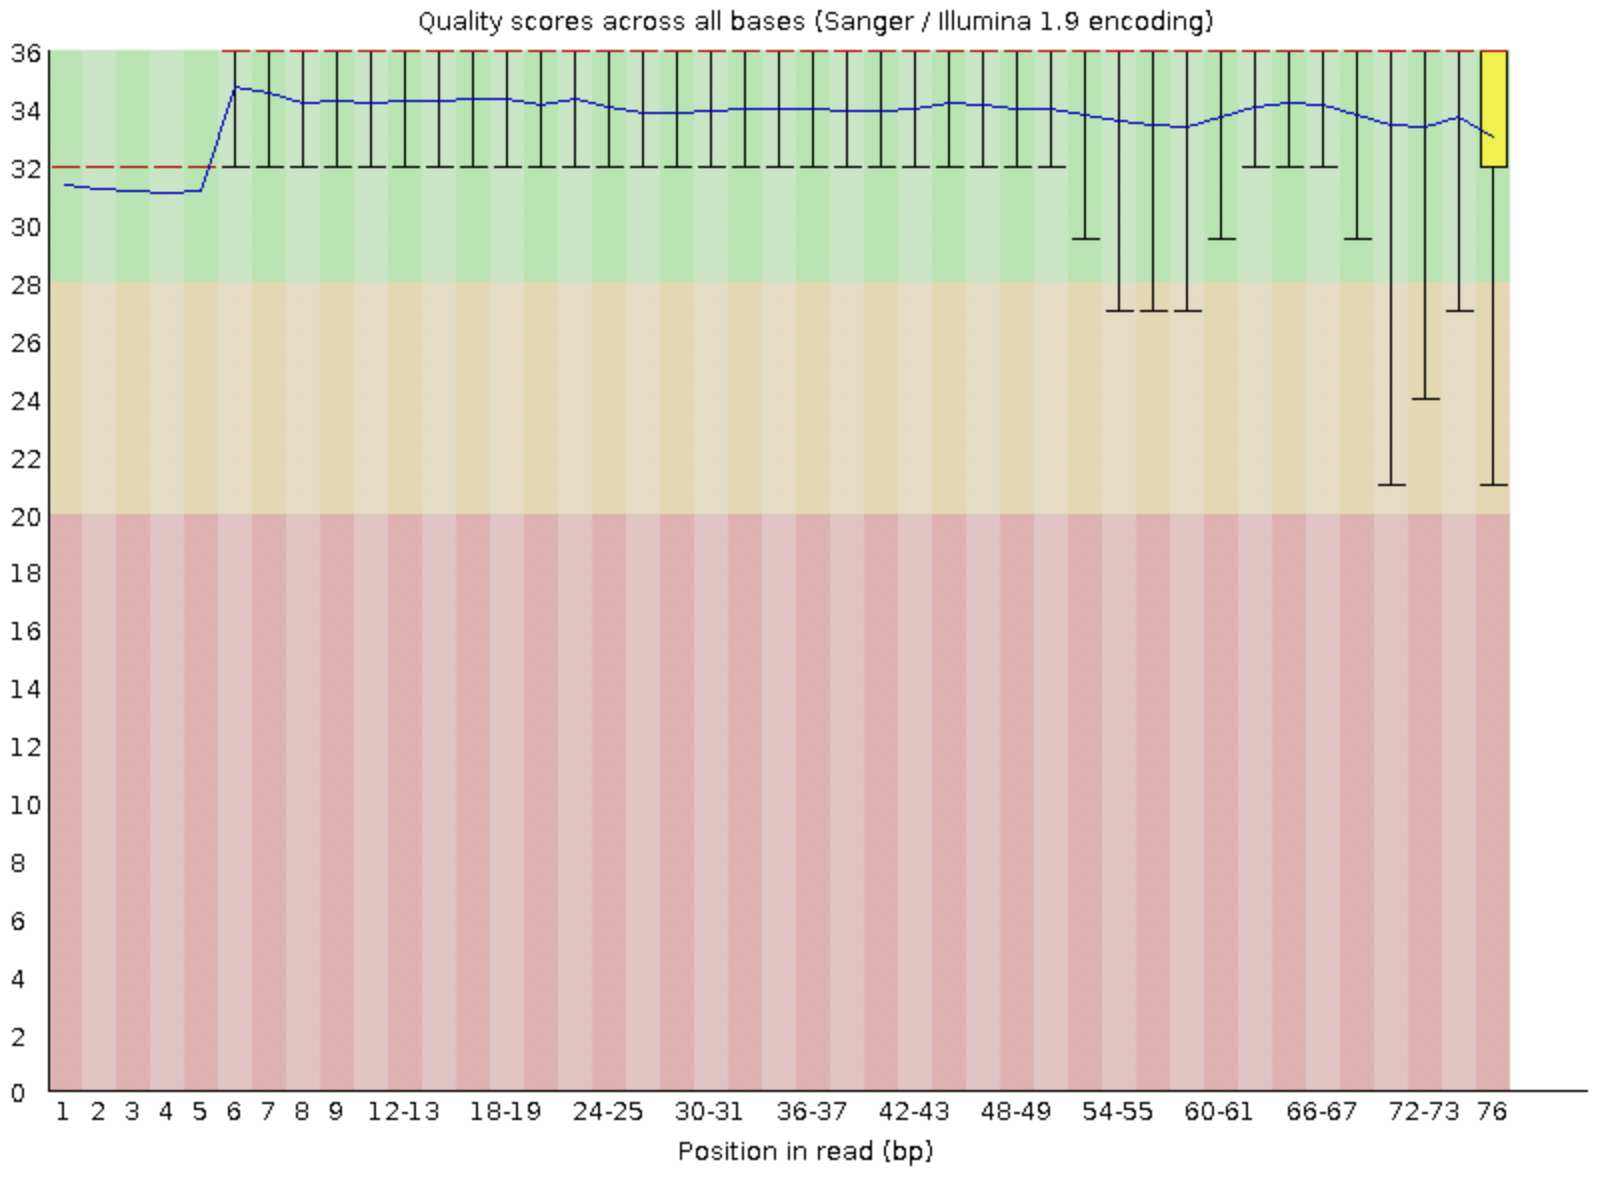

All the other fastq files also have good sequence quality.

**Zipping the fastq files:**

In [16]:
# Zip control FASTQ files
for fastq in fastq_files_control/*.fastq ; do
    gzip ${fastq};
done

In [41]:
# Zip schizophrenia FASTQ files
for fastq in fastq_files_SCZ/*.fastq ; do
    gzip ${fastq};
done

## Step 3: Aligning reads to a reference genome

The reads are aligned to the hg38 human reference genome. The pre-generated database is taken from:

    /mnt/storage/sdewin/STAR/star_db_hg38


In [6]:
mkdir alignment

**Align the control fastq files to hg38:**

In [5]:
SAMPLES=$(ls fastq_files_control | grep _1 | cut -f 1 -d _)
echo "Following samples will be aligned:"
echo ${SAMPLES} | sed "s/ /, /g"

for sample in ${SAMPLES}               #Loop over all samples
do
    echo "Aligning ${sample}" 
    STAR \
        --genomeDir /mnt/storage/sdewin/STAR/star_db_hg38 \
        --runThreadN 20 \
        --readFilesCommand zcat \
        --readFilesIn fastq_files_control/${sample}_1.fastq.gz fastq_files_control/${sample}_2.fastq.gz \
        --outFileNamePrefix alignment/${sample}. \
        --outSAMtype BAM SortedByCoordinate
done

Following samples will be aligned:
SRR15893391, SRR15893392, SRR15893393
Aligning SRR15893391
Dec 25 22:06:38 ..... started STAR run
Dec 25 22:06:38 ..... loading genome
Dec 25 22:07:29 ..... started mapping
Dec 25 22:10:52 ..... finished successfully
Aligning SRR15893392
Dec 25 22:10:52 ..... started STAR run
Dec 25 22:10:52 ..... loading genome
Dec 25 22:11:13 ..... started mapping
Dec 25 22:14:43 ..... finished successfully
Aligning SRR15893393
Dec 25 22:14:43 ..... started STAR run
Dec 25 22:14:43 ..... loading genome
Dec 25 22:15:04 ..... started mapping
Dec 25 22:18:25 ..... finished successfully


**Display mapping stats for one of the fastq files (SRR15893391):**

In [8]:
cat alignment/SRR15893391.Log.final.out

                                 Started job on |	Dec 25 22:06:38
                             Started mapping on |	Dec 25 22:07:29
                                    Finished on |	Dec 25 22:10:52
       Mapping speed, Million of reads per hour |	477.78

                          Number of input reads |	26941497
                      Average input read length |	146
                                    UNIQUE READS:
                   Uniquely mapped reads number |	22065445
                        Uniquely mapped reads % |	81.90%
                          Average mapped length |	149.26
                       Number of splices: Total |	2405750
            Number of splices: Annotated (sjdb) |	2371273
                       Number of splices: GT/AG |	2379470
                       Number of splices: GC/AG |	13158
                       Number of splices: AT/AC |	1180
               Number of splices: Non-canonical |	11942
                      Mismatch rate per base, % |	0.40%
           

In [9]:
# View the BAM file
samtools view alignment/SRR15893391.Aligned.sortedByCoord.out.bam | head -n 5

SRR15893391.17575622	355	chr1	11616	1	76M	=	11698	158	AGGAATGCCTGTTTCTCCACAAAGTGTTTACTTTTGGATTTTTGCCAGTCTAACAGGTAAAGCCCTGGAGATTCTT	AAAAAEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE/EEEEE	NH:i:4	HI:i:3	AS:i:148	nM:i:1
SRR15893391.17575622	403	chr1	11698	1	76M	=	11616	-158	GATTTGGGCTGGGGCCTGGCCATGTGTATTTTTTTAAATTTCCACTGATGATTTTGCTGCATGGCCGGTGTTGAGA	EEEEEEEEEAEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEAE/AAAAA	NH:i:4	HI:i:3	AS:i:148	nM:i:1
SRR15893391.10195802	99	chr1	12060	0	76M	=	12140	153	CTGGAGTGGAGTTTTCCTGTGGAGAGGAGCCATGCCTAGAGTGGGATGGGCCATTGTTCATCTTCTGGCCCCTGTT	AAA/AAEAEEAEAAEEAEEE6<EEEAA//EEEEEE/E/E/EAAEAEEAAEEEEE/EE<6E//EEEE/EEEEE/AEE	NH:i:6	HI:i:1	AS:i:147	nM:i:0
SRR15893391.12654353	99	chr1	12060	0	76M	=	12140	153	CTGGAGTGGAGTTTTCCTGTGGAGAGGAGCCATGCCTAGAGTGGGATGGGCCATTGTTCATCTTCTGGCCCCTGTT	AAAAAEEEEEEEEEEEEEEEEEEEEEE6EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEAEE	NH:i:6	HI:i:1	AS:i:147	nM:i:0
SRR15893391.10195802	147	chr1	12140	0	73M	=	12060

**Align the schizophrenia fastq files to hg38:**

In [ ]:
# Schizophrenia fastq files

SAMPLES=$(ls fastq_files_SCZ | grep _1 | cut -f 1 -d _)
echo "Following samples will be aligned:"
echo ${SAMPLES} | sed "s/ /, /g"

for sample in ${SAMPLES}               #Loop over all samples
do
    echo "Aligning ${sample}" 
    STAR \
        --genomeDir /mnt/storage/sdewin/STAR/star_db_hg38 \
        --runThreadN 20 \
        --readFilesCommand zcat \
        --readFilesIn fastq_files_SCZ/${sample}_1.fastq.gz fastq_files_SCZ/${sample}_2.fastq.gz \
        --outFileNamePrefix alignment/${sample}. \
        --outSAMtype BAM SortedByCoordinate
done

Following samples will be aligned:
SRR15893396, SRR15893397, SRR15893398
Aligning SRR15893396
Dec 25 22:21:31 ..... started STAR run
Dec 25 22:21:31 ..... loading genome
Dec 25 22:21:51 ..... started mapping
Dec 25 22:25:46 ..... finished successfully
Aligning SRR15893397
Dec 25 22:25:47 ..... started STAR run
Dec 25 22:25:47 ..... loading genome
Dec 25 22:26:10 ..... started mapping
Dec 25 22:30:00 ..... finished successfully
Aligning SRR15893398
Dec 25 22:30:01 ..... started STAR run
Dec 25 22:30:01 ..... loading genome
Dec 25 22:30:23 ..... started mapping


**Index the BAM files:**

In [19]:
BAMS=$(ls alignment | grep bam)

for bam in ${BAMS}
do
    echo "Indexing ${bam}"
    samtools index alignment/${bam}
    echo "Done"
done

Indexing SRR15893391.Aligned.sortedByCoord.out.bam
Done
Indexing SRR15893392.Aligned.sortedByCoord.out.bam
Done
Indexing SRR15893393.Aligned.sortedByCoord.out.bam
Done
Indexing SRR15893396.Aligned.sortedByCoord.out.bam
Done
Indexing SRR15893397.Aligned.sortedByCoord.out.bam
Done
Indexing SRR15893398.Aligned.sortedByCoord.out.bam
Done


In [7]:
ls -l alignment | grep bam

-rw-r--r-- 1 r0911921 domain users 2358879402 Dec  7 15:02 SRR15893391.Aligned.sortedByCoord.out.bam
-rw-r--r-- 1 r0911921 domain users    3337240 Dec  8 11:35 SRR15893391.Aligned.sortedByCoord.out.bam.bai
-rw-r--r-- 1 r0911921 domain users 2514346346 Dec  7 15:10 SRR15893392.Aligned.sortedByCoord.out.bam
-rw-r--r-- 1 r0911921 domain users    3275584 Dec  8 11:36 SRR15893392.Aligned.sortedByCoord.out.bam.bai
-rw-r--r-- 1 r0911921 domain users 2344713587 Dec  7 15:16 SRR15893393.Aligned.sortedByCoord.out.bam
-rw-r--r-- 1 r0911921 domain users    3563536 Dec  8 11:37 SRR15893393.Aligned.sortedByCoord.out.bam.bai
-rw-r--r-- 1 r0911921 domain users 2660936628 Dec  8 11:21 SRR15893396.Aligned.sortedByCoord.out.bam
-rw-r--r-- 1 r0911921 domain users    3741248 Dec  8 11:38 SRR15893396.Aligned.sortedByCoord.out.bam.bai
-rw-r--r-- 1 r0911921 domain users 2718884222 Dec  8 11:24 SRR15893397.Aligned.sortedByCoord.out.bam
-rw-r--r-- 1 r0911921 domain users    3345984 Dec  8 11:39 SRR15893397.Alig

**Mapping results for SRR15893391 (control) and SRR15893396 (schizophrenia) in IGV**

Mapped to the GAPDH gene (common housekeeping gene):
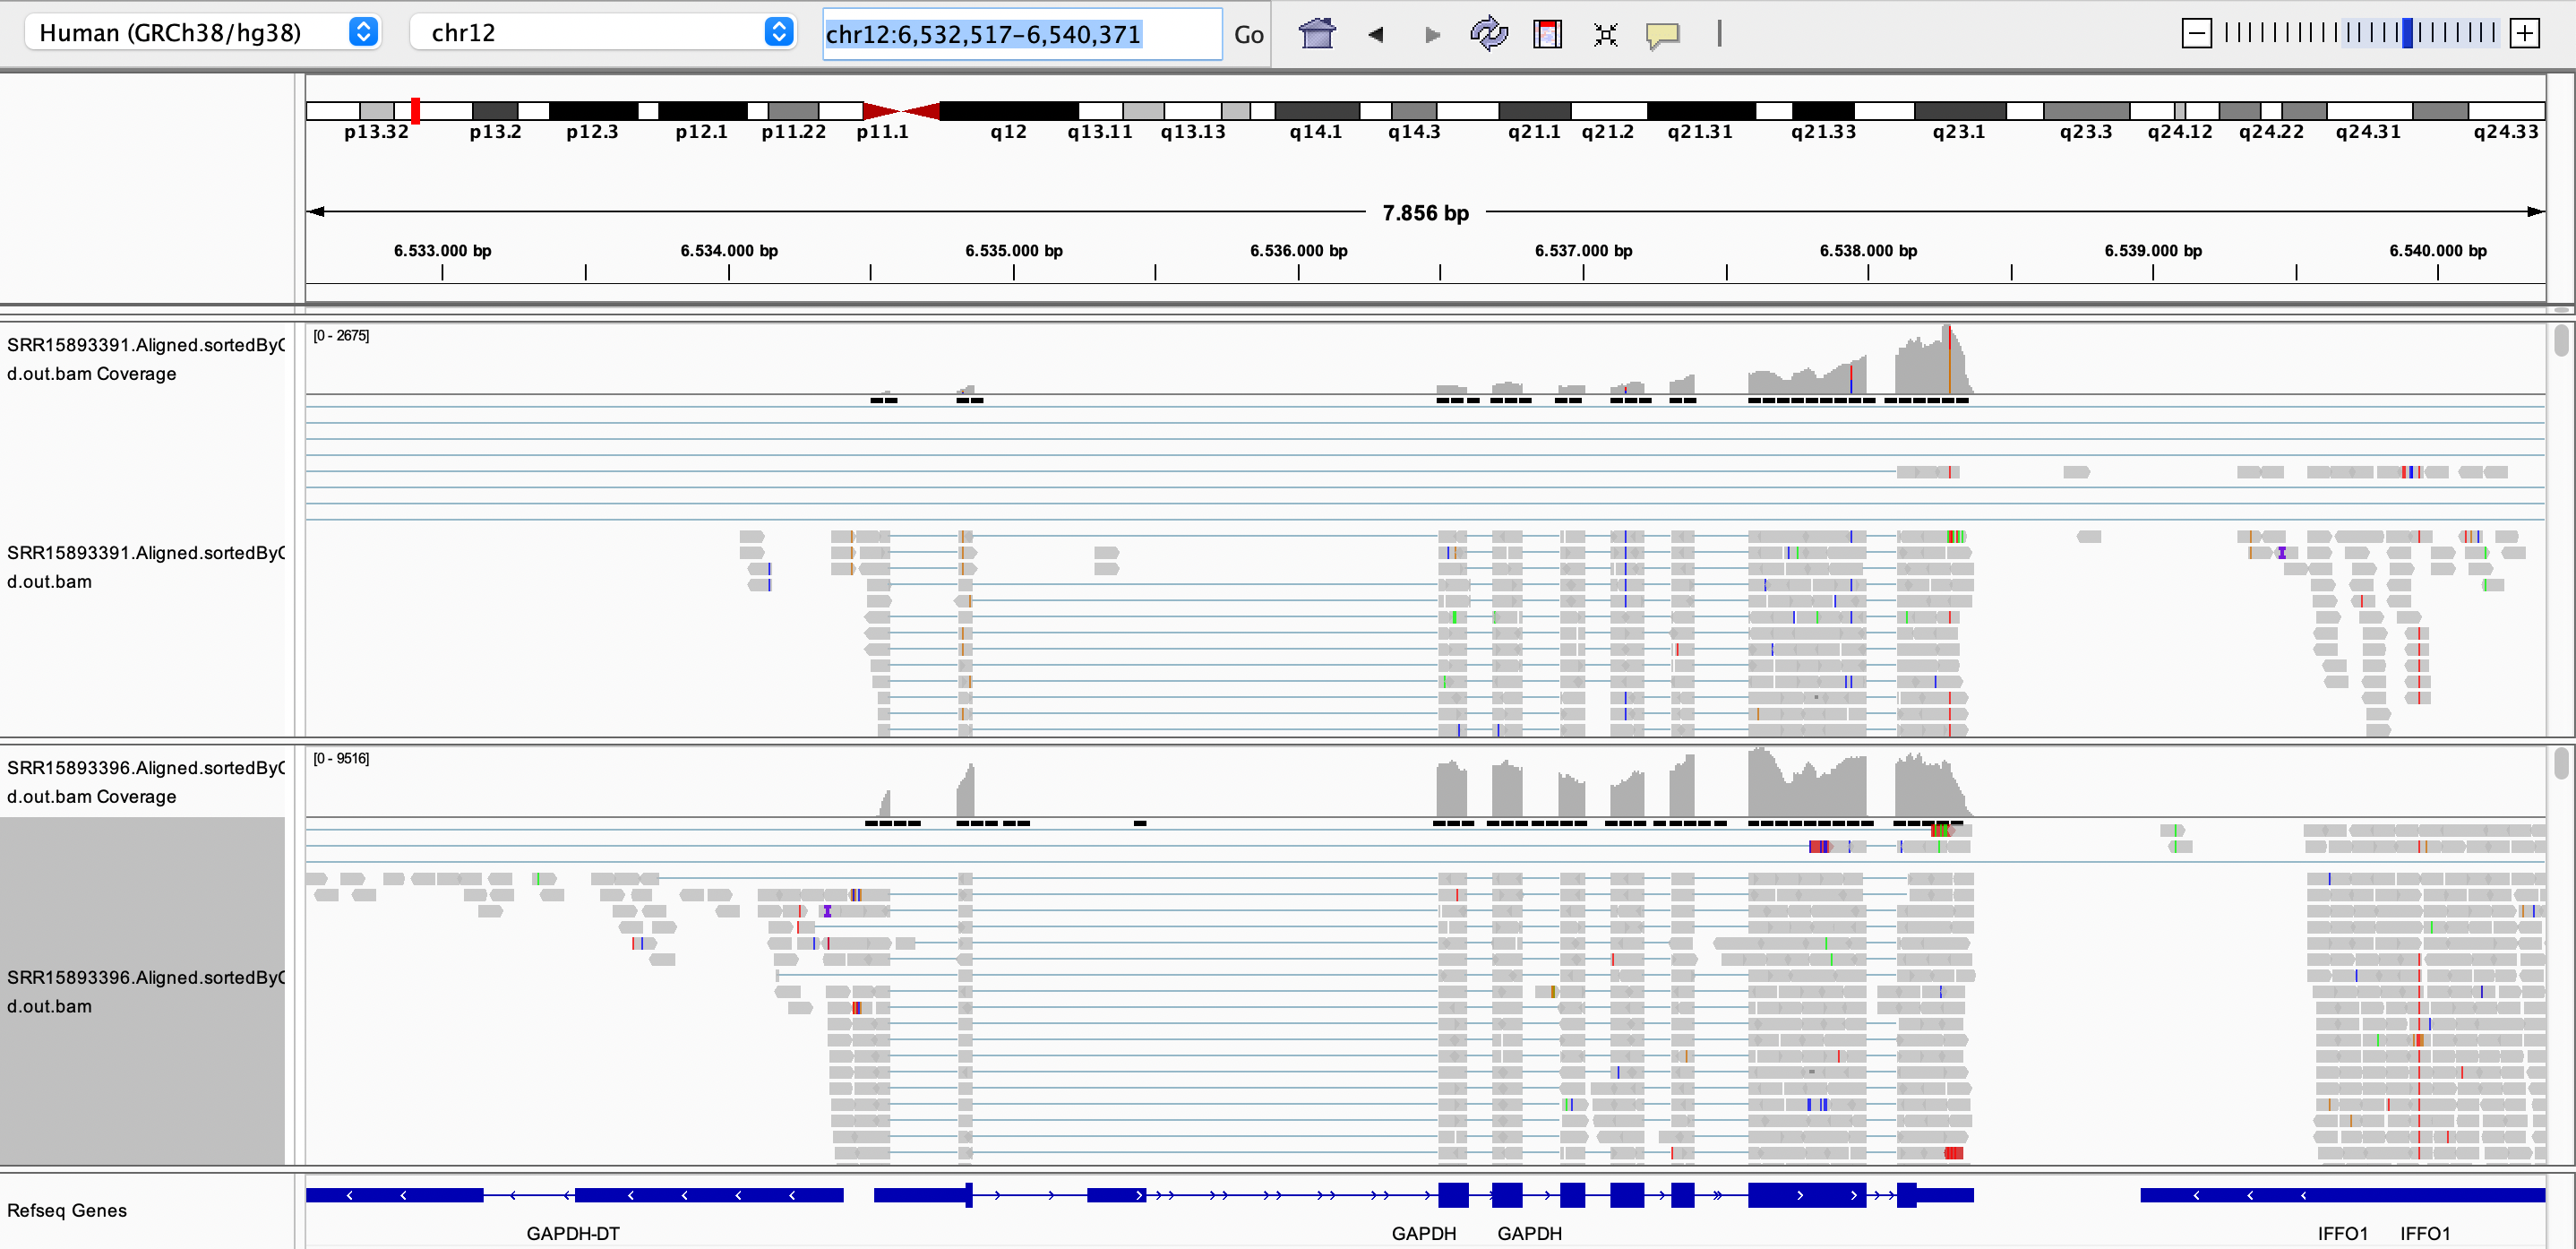
It seems that GAPDH is upregulated in iPSC-derived schizophrenia glutamatergic neurons, even if they are expected to have roughly same expression levels.

Mapped to the CACNA1D gene:
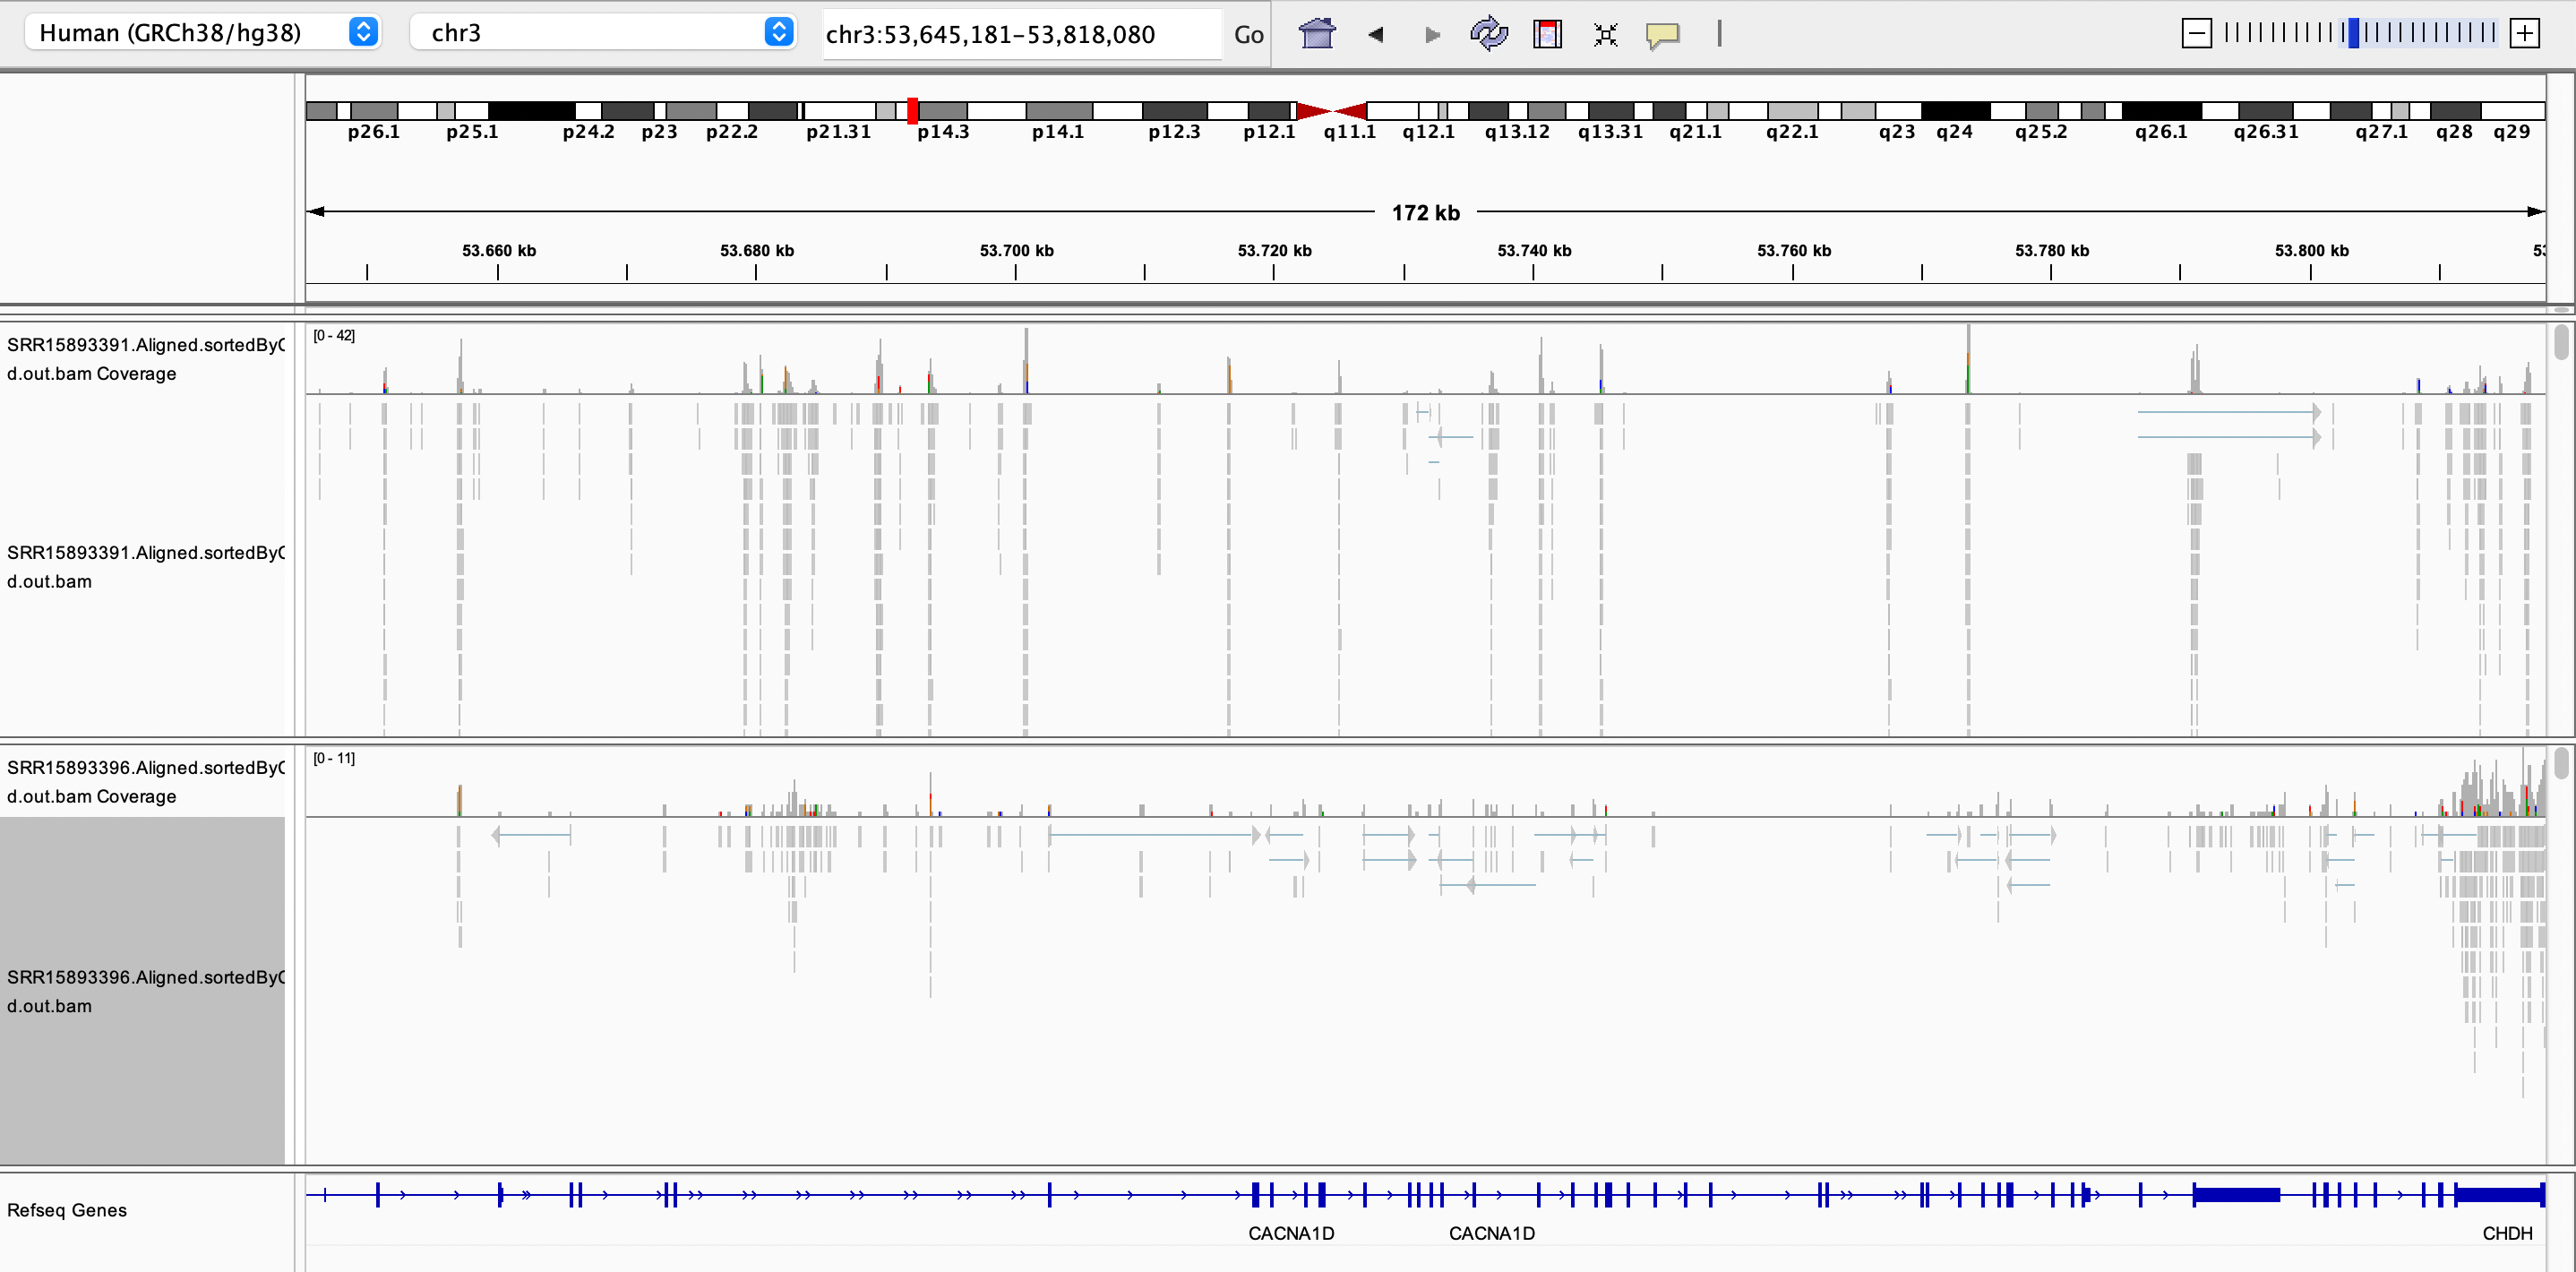
The research article from which the data set was taken from discovered that differentially expressed schizophrenia (SCZ) GWAS loci genes converge on the ion transporter pathway. One of those genes is CACNA1D, which encodes for a voltage-gated calcium channel. The authors knocked out the CACNA1D gene and found that CACNA1D dysregulation impairs Ca<sup>2+</sup> currents in developing glutamatergic neurons.  
In the IGV panel above, it can be observed that less reads are mapped to CACNA1D in SRR15893396 (schizophrenia) compared to in SRR15893391 (control), implying possible downregulation or dysregulation of the gene.

**See how many reads are mapped to each chromosome (for SRR15893391):**

In [21]:
samtools idxstats alignment/SRR15893391.Aligned.sortedByCoord.out.bam
# this commands outputs a tab delimited file with the following columns:
# Col 1 chromosome name
# Col 2 length of the chromosome
# Col 3 number of reads mapped to this chromosome
# Col 4 number of unmapped read fragments

chr1	248956422	4275005	0
chr2	242193529	3965799	0
chr3	198295559	2782600	0
chr4	190214555	2246392	0
chr5	181538259	2831376	0
chr6	170805979	2746603	0
chr7	159345973	2753869	0
chr8	145138636	1943512	0
chr9	138394717	2294921	0
chr10	133797422	1936422	0
chr11	135086622	2396408	0
chr12	133275309	2734524	0
chr13	114364328	1166636	0
chr14	107043718	1620532	0
chr15	101991189	1662695	0
chr16	90338345	1849678	0
chr17	83257441	2225722	0
chr18	80373285	916987	0
chr19	58617616	2208998	0
chr20	64444167	1105308	0
chr21	46709983	3279550	0
chr22	50818468	913400	0
chrX	156040895	1448150	0
chrY	57227415	241304	0
chrM	16569	265076	0
GL000008.2	209709	2232	0
GL000009.2	201709	3326	0
GL000194.1	191469	5342	0
GL000195.1	182896	11648	0
GL000205.2	185591	7930	0
GL000208.1	92689	104	0
GL000213.1	164239	1188	0
GL000214.1	137718	3844	0
GL000216.2	176608	2550	0
GL000218.1	161147	3050	0
GL000219.1	179198	6216	0
GL000220.1	161802	1366968	0
GL000221.1	155397	4656	0
GL000224.1	179693	3896	0
GL000225.1	211173	1966	0
G

## Step 4: Count number of reads overlapping each gene

Count how many reads overlap each gene (for each sample) --> generate a count matrix.  
The `featureCounts` program is used, along with a GTF file containing genomic features (like genes, exons, introns, ...) along with their genomic locations and other metadata.

In [23]:
ln -sf /mnt/storage/sdewin/STAR/star_db_hg38/gencode.v26.primary_assembly.annotation.gtf .

In [7]:
ls -l

total 8
drwxr-xr-x 3 r0911921 domain users 4096 Dec 28 21:17 alignment
drwxr-xr-x 2 r0911921 domain users  216 Dec 30 22:21 counts
drwxr-xr-x 2 r0911921 domain users 4096 Nov 13 16:10 fastqc_results
drwxr-xr-x 3 r0911921 domain users  244 Nov 24 15:05 fastq_files_control
drwxr-xr-x 3 r0911921 domain users  244 Nov 24 16:21 fastq_files_SCZ
lrwxrwxrwx 1 r0911921 domain users   81 Dec  8 11:51 gencode.v26.primary_assembly.annotation.gtf -> /mnt/storage/sdewin/STAR/star_db_hg38/gencode.v26.primary_assembly.annotation.gtf


In [6]:
head gencode.v26.primary_assembly.annotation.gtf

##description: evidence-based annotation of the human genome (GRCh38), version 26 (Ensembl 88)
##provider: GENCODE
##contact: gencode-help@sanger.ac.uk
##format: gtf
##date: 2017-03-14
chr1	HAVANA	gene	11869	14409	.	+	.	gene_id "ENSG00000223972.5"; gene_type "transcribed_unprocessed_pseudogene"; gene_name "DDX11L1"; level 2; havana_gene "OTTHUMG00000000961.2";
chr1	HAVANA	transcript	11869	14409	.	+	.	gene_id "ENSG00000223972.5"; transcript_id "ENST00000456328.2"; gene_type "transcribed_unprocessed_pseudogene"; gene_name "DDX11L1"; transcript_type "processed_transcript"; transcript_name "DDX11L1-002"; level 2; transcript_support_level "1"; tag "basic"; havana_gene "OTTHUMG00000000961.2"; havana_transcript "OTTHUMT00000362751.1";
chr1	HAVANA	exon	11869	12227	.	+	.	gene_id "ENSG00000223972.5"; transcript_id "ENST00000456328.2"; gene_type "transcribed_unprocessed_pseudogene"; gene_name "DDX11L1"; transcript_type "processed_transcript"; transcript_name "DDX11L1-002"; exon_number 1; exon_id 

**Count the reads overlapping these features:**

In [26]:
mkdir counts

In [6]:
#-Q 10 only count reads with a minimum mapping quality of 10
#-g gene_name use gene_name as feature names (you can also use gene_id, although this is less human readable)
#-a gencode.v26.primary_assembly.annotation.gtf specify the annotation file
#-o counts/mcf7_ns_s.counts specify the output file
#alignment/*.bam count for all the bam files in the alignment folder
featureCounts \
    -p \
    -Q 10 \
    -g gene_name \
    -a gencode.v26.primary_assembly.annotation.gtf \
    -o counts/iPSC_control_schizophrenia \
    alignment/*.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v1.6.0

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 6 BAM files                                      ||
||                           P alignment/SRR15893391.Aligned.sortedByCoor ... ||
||                           P alignment/SRR15893392.Aligned.sortedByCoor ... ||
||                           P alignment/SRR15893393.Aligned.sortedByCoor ... ||
||                           P alignment/SRR15893396.Aligned.sort

In [14]:
head counts/iPSC_control_schizophrenia.counts

# Program:featureCounts v1.6.0; Command:"featureCounts" "-p" "-Q" "10" "-g" "gene_name" "-a" "gencode.v26.primary_assembly.annotation.gtf" "-o" "counts/mcf7_ns_s.counts" "alignment/SRR15893391.Aligned.out.bam" "alignment/SRR15893392.Aligned.out.bam" "alignment/SRR15893393.Aligned.out.bam" "alignment/SRR15893396.Aligned.out.bam" "alignment/SRR15893397.Aligned.out.bam" "alignment/SRR15893398.Aligned.out.bam" 
Geneid	Chr	Start	End	Strand	Length	alignment/SRR15893391.Aligned.out.bam	alignment/SRR15893392.Aligned.out.bam	alignment/SRR15893393.Aligned.out.bam	alignment/SRR15893396.Aligned.out.bam	alignment/SRR15893397.Aligned.out.bam	alignment/SRR15893398.Aligned.out.bam
DDX11L1	chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1	11869;12010;12179;12613;12613;12975;13221;13221;13453	12227;12057;12227;12721;12697;13052;13374;14409;13670	+;+;+;+;+;+;+;+;+	1735	0	0	0	0	0	0
WASH7P	chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1	14404;15005;15796;16607;16858;17233;17606;17915;18268;24738;29534	14

**Format the output file (iPSC_control_schizophrenia.counts) to get the count matrix:**

In [12]:
cat counts/iPSC_control_schizophrenia.counts \
    | grep -v "#" \
    | cut -f 1,7,8,9,10,11,12 \
    | sed "s/alignment\///g" \
    | sed "s/.Aligned.out.bam//g" \
    > counts/iPSC_control_schizophrenia.counts.formatted

In [15]:
ls -l counts

total 547540
-rw-r--r-- 1 r0911921 domain users  32573058 Dec 25 23:17 iPSC_control_schizophrenia.counts
-rw-r--r-- 1 r0911921 domain users   1418619 Dec 25 23:21 iPSC_control_schizophrenia.counts.formatted
-rw-r--r-- 1 r0911921 domain users       789 Dec 25 23:17 iPSC_control_schizophrenia.counts.summary
-rw-r--r-- 1 r0911921 domain users 526680064 Dec  8 12:08 temp-core-3652356-B02628B480DE.sam.fixbam


In [16]:
head counts/iPSC_control_schizophrenia.counts.formatted | column -t

Geneid       SRR15893391  SRR15893392  SRR15893393  SRR15893396  SRR15893397  SRR15893398
DDX11L1      0            0            0            0            0            0
WASH7P       4            1            27           34           34           43
MIR6859-1    0            1            6            5            13           8
MIR1302-2HG  0            0            0            1            0            2
MIR1302-2    0            0            0            0            0            0
FAM138A      0            0            0            0            0            0
OR4G4P       0            0            0            0            0            0
OR4G11P      0            0            0            0            0            0
OR4F5        0            0            0            0            0            0


**Find read counts for CACNA1D and GAPDH:**

In [8]:
cat counts/iPSC_control_schizophrenia.counts.formatted | grep CACNA1D

CACNA1D	123	145	113	71	168	162


In [10]:
cat counts/iPSC_control_schizophrenia.counts.formatted | grep -w GAPDH

GAPDH	2606	5480	19681	32899	19732	22490


# PART 2: DeSeq2 analysis in R
Differential expression analysis is done using the DeSeq2 package in R.

## Step 1: Load data

In [1]:
setwd('/mnt/storage/r0911921/jupyternotebooks/transcriptomics_assignment')

**Convert the count matrix file into a R matrix object:**

In [2]:
cts <- as.matrix(read.csv("counts/iPSC_control_schizophrenia.counts.formatted", sep="\t", row.names = "Geneid"))

In [3]:
head(cts)

SRR15893391 SRR15893392 SRR15893393 SRR15893396 SRR15893397
DDX11L1     0           0            0           0           0         
WASH7P      4           1           27          34          34         
MIR6859-1   0           1            6           5          13         
MIR1302-2HG 0           0            0           1           0         
MIR1302-2   0           0            0           0           0         
FAM138A     0           0            0           0           0         
            SRR15893398
DDX11L1      0         
WASH7P      43         
MIR6859-1    8         
MIR1302-2HG  2         
MIR1302-2    0         
FAM138A      0

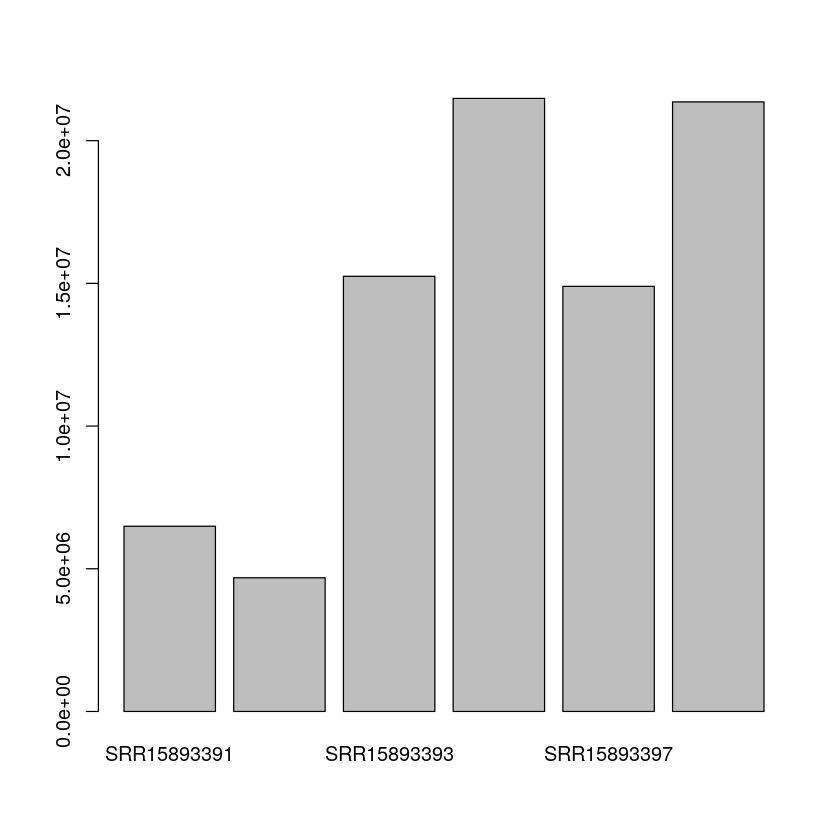

In [4]:
barplot(colSums(cts))

**Generate a dataframe containing metadata on our sample:**

In [5]:
coldata <- data.frame(
    row.names = c("SRR15893391", "SRR15893392", "SRR15893393", "SRR15893396", "SRR15893397", "SRR15893398"),
    condition = c("control", "control", "control", "schizophrenia", "schizophrenia", "schizophrenia") # Specify wether the sample was treated with nutlin or not
)

In [6]:
coldata

condition    
SRR15893391 control      
SRR15893392 control      
SRR15893393 control      
SRR15893396 schizophrenia
SRR15893397 schizophrenia
SRR15893398 schizophrenia

**Check that the columns of the count matrix and the rows of the coldata are in the same order:**

In [7]:
all(rownames(coldata) == colnames(cts))

[1] TRUE

**Construct the DESeqDataSet:**

In [8]:
suppressWarnings(library("DESeq2"))

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min



Attaching package: ‘S4Vectors’


The

In [9]:
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design = ~ condition)

In [10]:
dds

class: DESeqDataSet 
dim: 56505 6 
metadata(1): version
assays(1): counts
rownames(56505): DDX11L1 WASH7P ... AC007325.4 AC007325.2
rowData names(0):
colnames(6): SRR15893391 SRR15893392 ... SRR15893397 SRR15893398
colData names(1): condition

**Set the order of the schizophrenia and control group. Our control group is the baseline, so we set this as the first level:**

In [11]:
dds$condition <- factor(dds$condition, levels = c("control","schizophrenia"))

**Prefiltering --> to only keep genes that have a count of at least 10 for a minimum of 2 samples:**

In [12]:
smallestGroupSize <- 2
keep <- rowSums(counts(dds) >= 10) >= smallestGroupSize
dds <- dds[keep,]

In [13]:
dim(dds)

[1] 22993     6

## Step 2. Model read counts and performing differential expression analysis

**The distribution of the expression of genes in one of the samples (SRR15893392):**

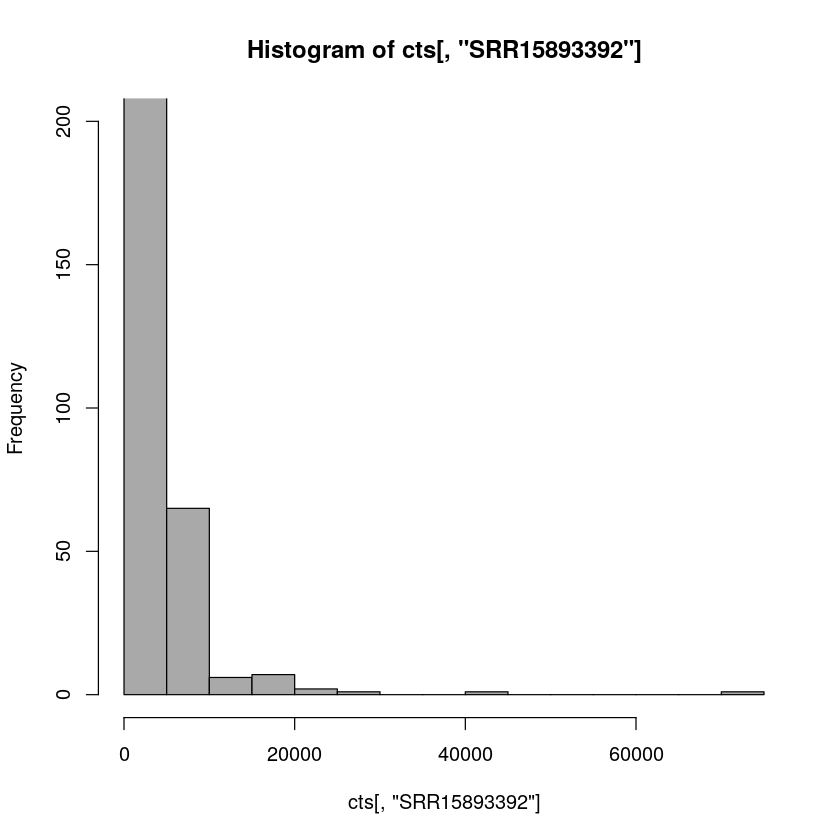

In [14]:
hist(cts[, 'SRR15893392'], ylim=c(0, 200), col = "darkgray")

In [15]:
library(ggplot2)

In [16]:
data <- data.frame(
    mean = rowMeans(cts[rowSums(cts) != 0, ]),
    var  = rowVars(cts[rowSums(cts) != 0, ]))

In [17]:
head(data)

mean     var     
WASH7P        23.83333 299.7667
MIR6859-1      5.50000  22.7000
MIR1302-2HG    0.50000   0.7000
RP11-34P13.7   3.00000  10.8000
CICP27        15.66667 318.2667
RP11-34P13.15 14.50000 118.7000

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


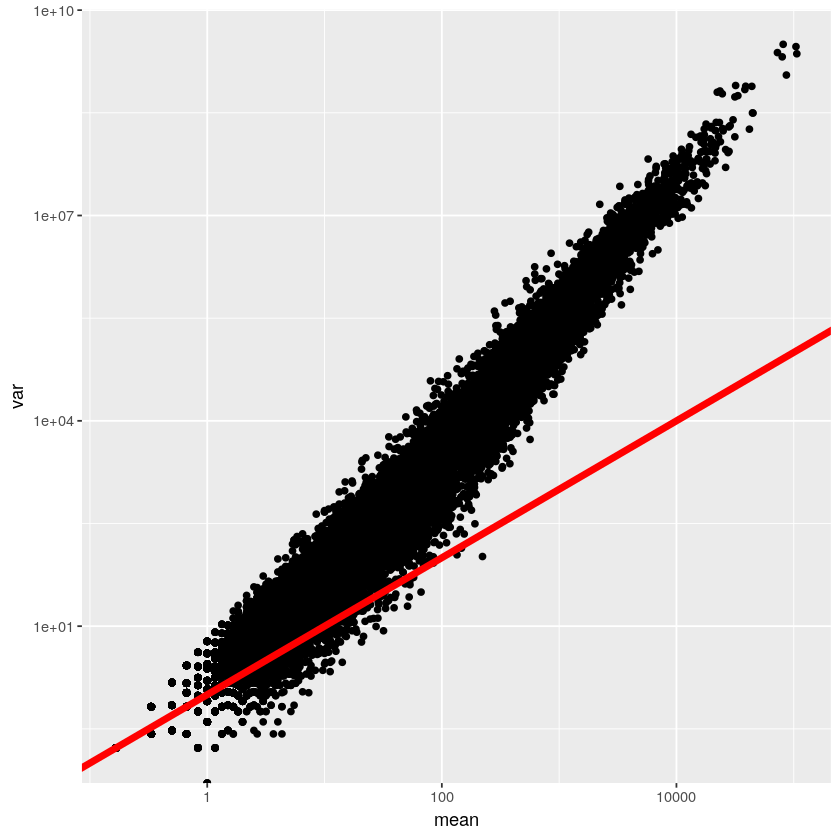

In [18]:
ggplot(data, aes(x = mean, y = var)) +
    geom_point() +
    scale_x_continuous(trans = "log10") +
    scale_y_continuous(trans = "log10") +
    geom_abline(intercept = 0, slope = 1, color = "red", size = 2)

**Use the wrapper function `DESeq` to combine the three functions `estimateSizeFactors`, `estimateDispersions`, and `nbinomWaldTest`:**

In [19]:
dds <- DESeq(dds)
res <- results(dds)
res

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): condition schizophrenia vs control 
Wald test p-value: condition schizophrenia vs control 
DataFrame with 22993 rows and 6 columns
                      baseMean      log2FoldChange             lfcSE
                     <numeric>           <numeric>         <numeric>
WASH7P        17.7499620517296    1.23018673188673 0.969643061911312
CICP27        25.3811429738348    -4.2420917879431  1.07361270993997
RP11-34P13.15  13.421369532873  -0.614596147002599  1.12357435208047
RP11-34P13.16 4.46252504612485  -0.262124798865533  1.45821070880193
RP11-34P13.13 4.42526820984646 -0.0085487024203031  1.69070288148873
...                        ...                 ...               ...
AC011043.1    200.566802497526   0.849473400449362 0.562719665724971
AL592183.1    112.999154494122  -0.653206624798899  1.20333194672704
AC240274.1    253.952545163138    1.70225886234051 0.629668064578832
AC007325.4     22.586627654465  -0.769356969392604 0.924323165190138
AC007325.2    13.

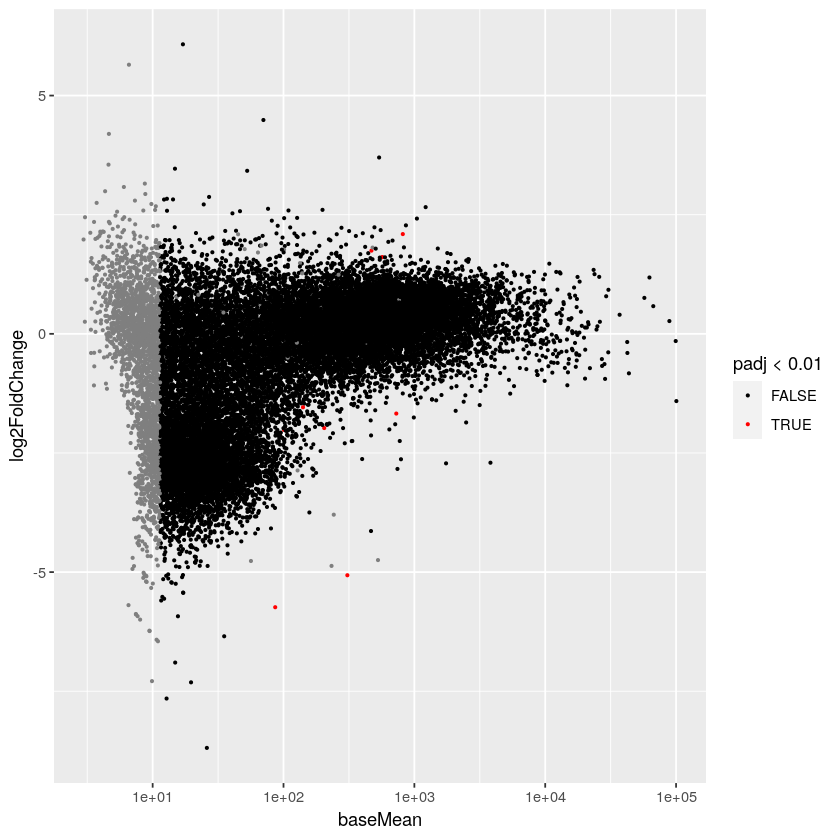

In [45]:
# using the pre-filtered dataset (keep genes that have a count of at least 10 for a minimum of 2 samples)
ggplot(as.data.frame(res), aes(x = baseMean, y = log2FoldChange)) + 
    geom_point(aes(colour = padj < 0.01), size = 0.5) + 
    scale_x_continuous(trans = "log10") +
    scale_color_manual(name = "padj < 0.01", values = setNames(c("red", "black"), c(T, F)))

Genes with a low baseMean have big variance of log2FoldChange.

**Plot the standard error of the log2foldchange vs the mean:**

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


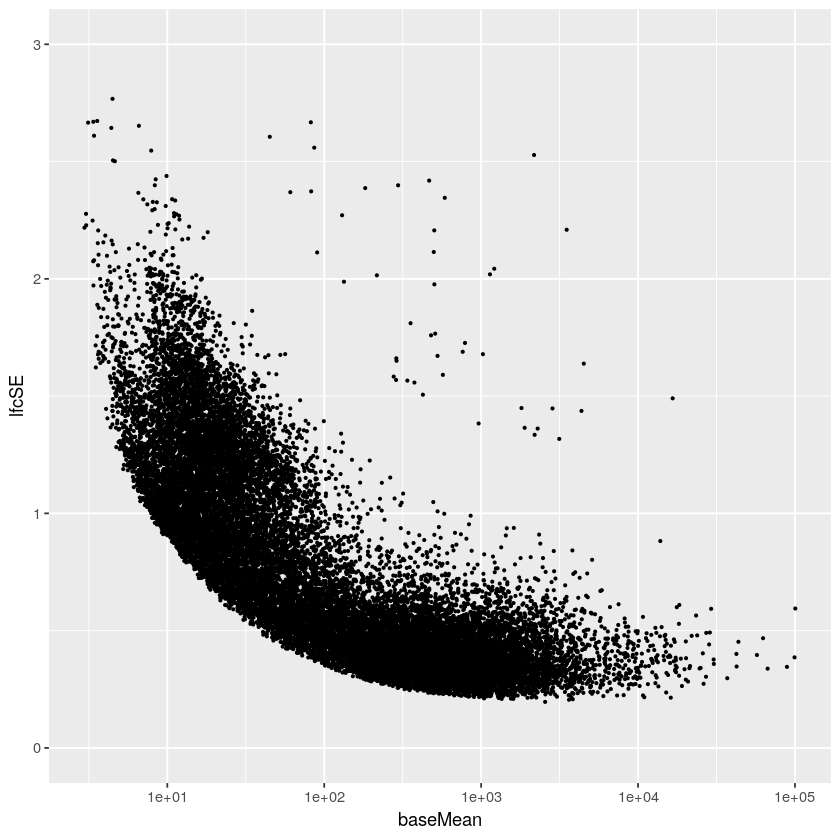

In [46]:
ggplot(as.data.frame(res), aes(x = baseMean, y = lfcSE)) +
    geom_point(size = 0.5) +
    scale_x_continuous(trans = "log10") +
    ylim(0, 3)

The `lfcShrink` function is used to *shrink* Log2FoldChange towards zero in such a manner that the shrinkage is stronger when the available information for a gene is low (i.e. low number of counts --> dispersion is higher).

In [20]:
resultsNames(dds)

[1] "Intercept"                          "condition_schizophrenia_vs_control"

We want to shrink the coefficient `condition_schizophrenia_vs_control` as this stores our Log2FoldChange values.

In [21]:
resLFC <- lfcShrink(dds, coef="condition_schizophrenia_vs_control")

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895



In [22]:
resLFC

log2 fold change (MAP): condition schizophrenia vs control 
Wald test p-value: condition schizophrenia vs control 
DataFrame with 22993 rows and 6 columns
                      baseMean       log2FoldChange             lfcSE
                     <numeric>            <numeric>         <numeric>
WASH7P        17.7499620517296    0.769458914616689 0.601232548977619
CICP27        25.3811429738348    -2.35426573438352 0.609739288836753
RP11-34P13.15  13.421369532873   -0.337906166884587  0.61769631405168
RP11-34P13.16 4.46252504612485   -0.111355541813533 0.612647686452563
RP11-34P13.13 4.42526820984646 -0.00303849859080402 0.592239626026409
...                        ...                  ...               ...
AC011043.1    200.566802497526    0.705086913689793 0.466671600360355
AL592183.1    112.999154494122   -0.336240402184031 0.620423244292947
AC240274.1    253.952545163138     1.35315137165695 0.500476082846857
AC007325.4     22.586627654465    -0.49396779871616 0.594753413114211
AC007

**MA plot using padj<0.01 as threshold:**

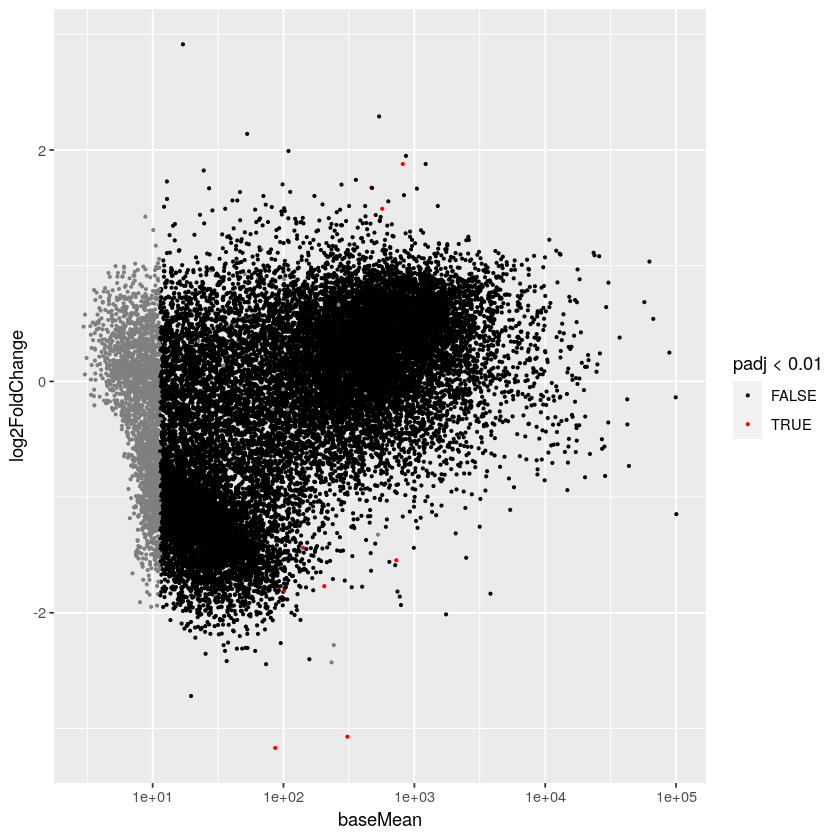

In [50]:
ggplot(as.data.frame(resLFC), aes(x = baseMean, y = log2FoldChange)) +
    geom_point(aes(colour = padj < 0.01), size = 0.5) +
    scale_x_continuous(trans = "log10") +
    scale_color_manual(name = "padj < 0.01", values = setNames(c("red", "black"), c(T, F)))

**MA plot using padj<0.05 as threshold:**

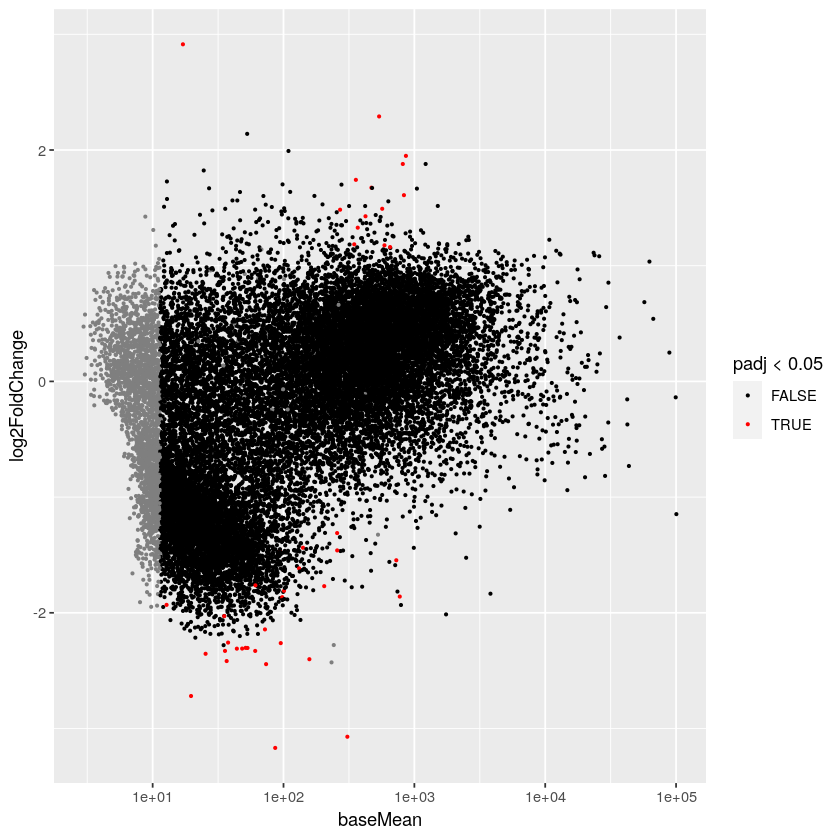

In [51]:
ggplot(as.data.frame(resLFC), aes(x = baseMean, y = log2FoldChange)) +
    geom_point(aes(colour = padj < 0.05), size = 0.5) +
    scale_x_continuous(trans = "log10") +
    scale_color_manual(name = "padj < 0.05", values = setNames(c("red", "black"), c(T, F)))

There are some extra down-regulated genes, but there is almost no difference compared with padj<0.01 threshold.

**MA plot using padj<0.1 as threshold:**

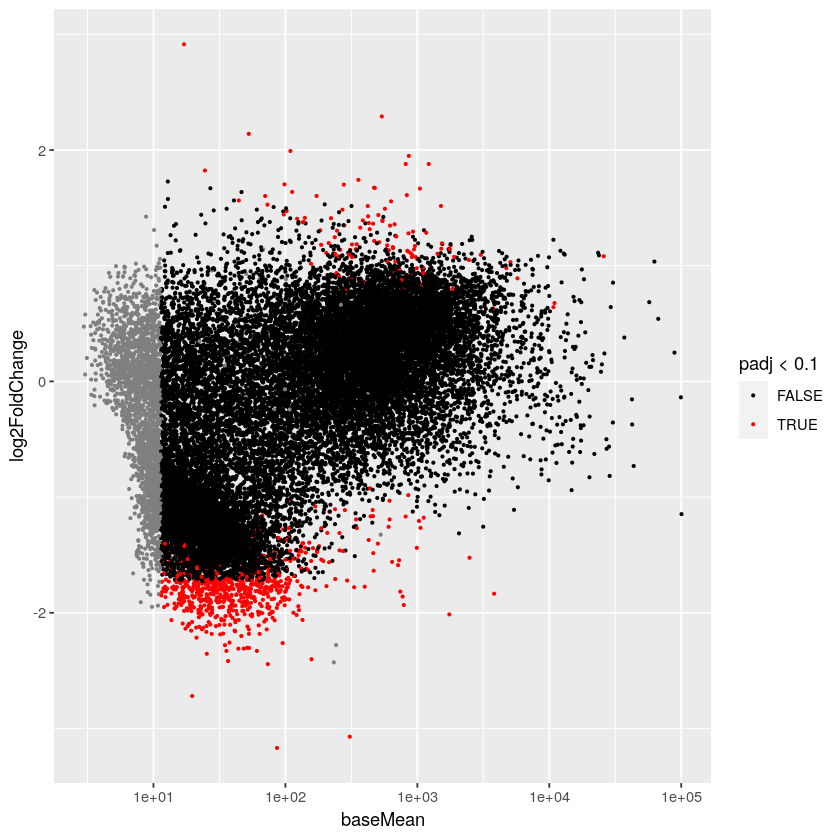

In [77]:
ggplot(as.data.frame(resLFC), aes(x = baseMean, y = log2FoldChange)) +
    geom_point(aes(colour = padj < 0.1), size = 0.5) +
    scale_x_continuous(trans = "log10") +
    scale_color_manual(name = "padj < 0.1", values = setNames(c("red", "black"), c(T, F)))

There are much more downregulated genes when using padj<0.1 as a threshold.  

It seems that there may be plenty of downregulated genes in schizophrenia cells, but a lot of them are not significant when the adjusted p-value is strict (i.e. they all have relatively large p-values). They also generally have low baseMean (corresponding to normalized read counts).

**Plot the standard error of the log2foldchange vs the mean:**

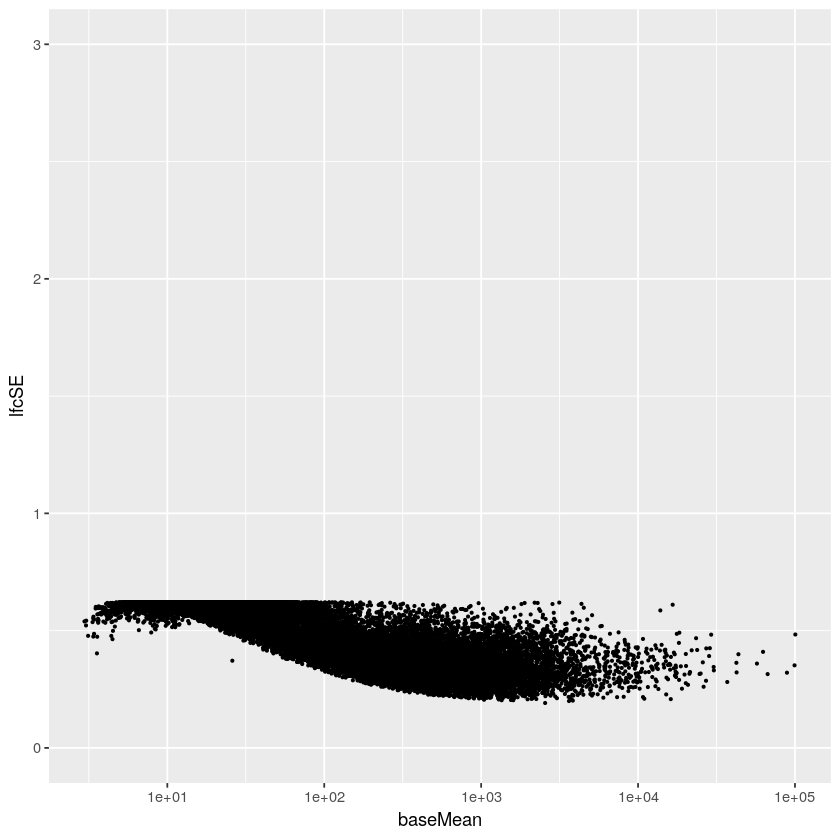

In [55]:
ggplot(as.data.frame(resLFC), aes(x = baseMean, y = lfcSE)) +
    geom_point(size = 0.5) +
    scale_x_continuous(trans = "log10") +
    ylim(0, 3)

## Step 3: Downstream analysis

### Getting a list of up- or down-regulated genes
Use the package dplyr.

In [23]:
suppressWarnings(library(dplyr))


Attaching package: ‘dplyr’


The following object is masked from ‘package:matrixStats’:

    count


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [24]:
resLFC_df <- as.data.frame(resLFC)

**Plot histograms of padj values and log2FoldChange:**

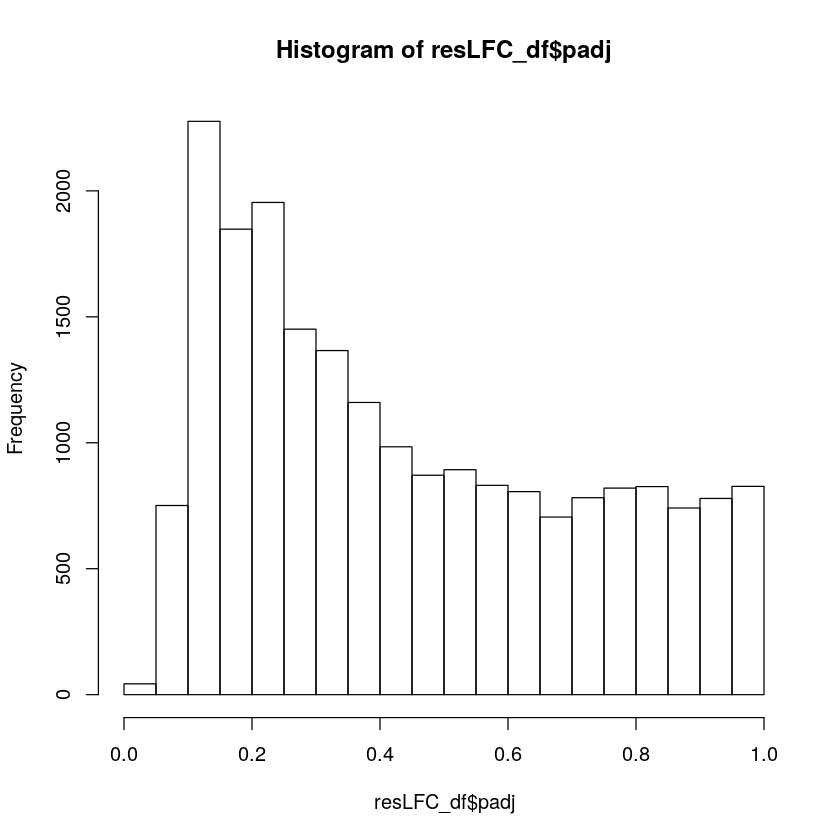

In [41]:
hist(resLFC_df$padj)

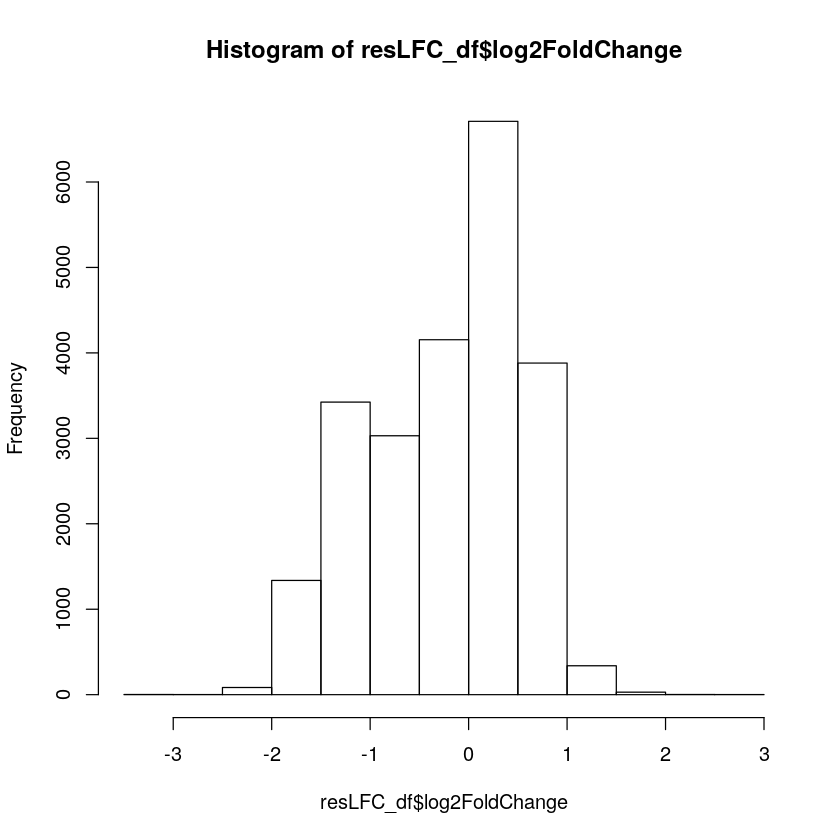

In [43]:
hist(resLFC_df$log2FoldChange)

**Define upregulated and downregulated genes using padj<0.05 as threshold:**

In [25]:
upregulated_genes <- row.names(resLFC_df %>% 
    filter(log2FoldChange > 1, padj < 0.05))

In [26]:
downregulated_genes <- row.names(resLFC_df %>% 
    filter(log2FoldChange < -1, padj < 0.05))

In [27]:
upregulated_genes

[1] "MTND2P28" "IAH1"     "NGEF"     "SEL1L3"   "HLA-DMB"  "NKAIN2"  
 [7] "WIPF3"    "PLPPR1"   "BRINP1"   "HTRA1"    "PAX6"     "HS3ST4"  
[13] "NFIX"     "CHRDL1"

In [28]:
downregulated_genes

[1] "CICP27"        "LHX8"          "AC009404.2"    "LINC00608"    
 [5] "SPARCL1"       "CKMT2-AS1"     "SAMD5"         "COL22A1"      
 [9] "SNHG7"         "RP11-499P20.2" "PRLHR"         "ETS1"         
[13] "METTL7A"       "RP11-83B20.1"  "RNU6-1077P"    "RP11-93G5.1"  
[17] "RP11-340L3.1"  "SFTA3"         "NKX2-1"        "RP11-430B1.1" 
[21] "RP11-679B19.1" "MAF"           "CTD-2349P21.5" "LHX1"         
[25] "HOXB4"         "HOXB5"         "BTBD17"        "AC010492.2"   
[29] "C21orf33"

**Check stats for genes related to the ion channel pathways (obtained from Figure 4D of the reference):**

In [52]:
resLFC_df[c('NDUFA4L2','CACNA1D','KCNH6','P2RX7','P2RX4','HVCN1'),]

baseMean  log2FoldChange lfcSE     stat       pvalue       padj      
NDUFA4L2  51.70753  0.5733369     0.4414058  1.2965087 0.1948002676 0.38426455
CACNA1D  148.92107 -0.8834076     0.4954783 -1.7845621 0.0743323701 0.23807022
KCNH6     23.55645 -2.0123407     0.5997269 -3.3992368 0.0006757417 0.08077697
P2RX7     46.92391 -1.1261568     0.5616881 -2.0121690 0.0442021245 0.19417108
P2RX4    151.60084 -0.6606501     0.4002445 -1.6514798 0.0986406416 0.27221453
HVCN1     30.31938 -0.3974222     0.5022080 -0.7926137 0.4280029021 0.60777762

log2FoldChange of CACNA1D turns out to be below the threshold and not significant.  
Only KCNH6 and P2RX7 have a log2FoldChange larger than the threshold (i.e. less than -1), but even these are also not significant when using a threshold of padj<0.05.

**Check stats for GAPDH:**

In [56]:
resLFC_df['GAPDH',]

baseMean log2FoldChange lfcSE     stat     pvalue    padj     
GAPDH 13783.63 0.5798789      0.4149773 1.397416 0.1622886 0.3483933

log2FoldChange of GAPDH is not huge (~0.58). It is also not significant, so it might be that GAPDH has similar expression in control and schizophrenia iPSCs.

**Check stats for phenotype markers (obtained from Supplementary Figure 8A of the reference):**

In [55]:
resLFC_df[c('NES','SOX1','FOXG1','RBFOX3','SYP','POU3F3','STAB1','S100B','SOX10','TH','TPH1','PVALB'),]

baseMean   log2FoldChange lfcSE     stat       pvalue      padj     
NES    5317.32807  0.5308288     0.4706577  1.1279008 0.259361813 0.4521098
SOX1   2108.64237  0.2236612     0.4843957  0.4617057 0.644292351 0.7768594
FOXG1  7352.55754  0.4148519     0.2164203  1.9168663 0.055254920 0.2112106
RBFOX3  530.29712 -0.1092437     0.4229283 -0.2583332 0.796149729 0.8776714
SYP    2654.16223  0.1433342     0.2632345  0.5445098 0.586090733 0.7350620
POU3F3 2983.84621  0.3259783     0.3087015  1.0559342 0.290998261 0.4849308
NA             NA         NA            NA         NA          NA        NA
S100B    14.09499 -1.6494533     0.5770796 -2.8580071 0.004263109 0.1015333
NA.1           NA         NA            NA         NA          NA        NA
TH       21.81725 -0.3602658     0.5687877 -0.6324711 0.527079120 0.6909572
TPH1     72.97107 -1.7255215     0.5652820 -3.0688816 0.002148617 0.0987424
NA.2           NA         NA            NA         NA          NA        NA

Most of the phenotype markers have a very low log2FoldChange, which is to be expected.

In [74]:
write.table(resLFC_df, "RNAseq.results.tsv", sep="\t", col.names=NA, quote=FALSE)

**Plotting a heatmap:**

In [75]:
library(pheatmap)

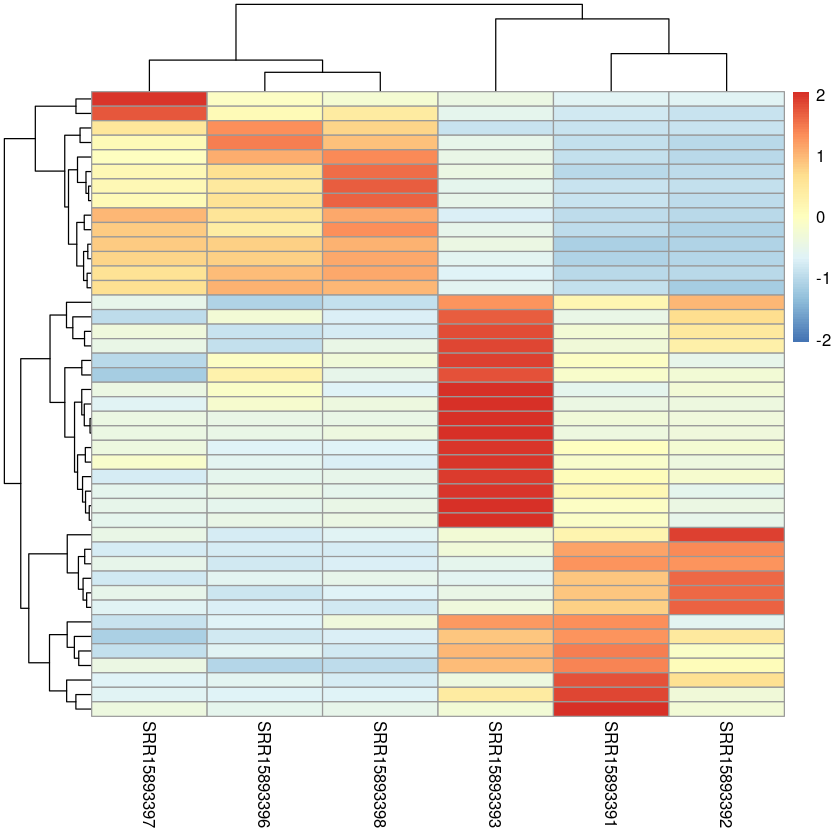

In [76]:
pheatmap(cts[c(upregulated_genes, downregulated_genes), ], scale = "row", show_rownames = F)

# PART 3: Functional analysis

In [2]:
cd transcriptomics_assignment

In [3]:
head RNAseq.results.tsv

	baseMean	log2FoldChange	lfcSE	stat	pvalue	padj
WASH7P	17.7499620517296	0.769458914616689	0.601232548977619	1.26870059737431	0.204547869334704	0.395206096949824
CICP27	25.3811429738348	-2.35426573438352	0.609739288836753	-3.95123096873571	7.77502417950246e-05	0.0452846785402461
RP11-34P13.15	13.421369532873	-0.337906166884587	0.61769631405168	-0.547000869025341	0.584378135087356	0.734203232255685
RP11-34P13.16	4.46252504612485	-0.111355541813533	0.612647686452563	-0.17975783423021	0.857342687717503	NA
RP11-34P13.13	4.42526820984646	-0.00303849859080402	0.592239626026409	-0.00505630085209038	0.995965672805738	NA
RP11-34P13.18	43.6522701212019	0.480018637899204	0.599229267795478	0.798377671639789	0.424651356624346	0.605217297448514
RP4-669L17.10	10.8674331237768	0.572307661583965	0.616848030439529	0.92308132115199	0.355964827932494	NA
U6	54.0708446153426	-1.45107623996716	0.62008938936418	-2.42819858616412	0.0151740321197246	0.132329707369882
MTND2P28	537.840394738135	2.29005257303572	0.

**List all the downregulated genes (using padj<0.05):**

In [7]:
# downregulated genes
awk '$3 != "NA" && $3 < -1 && $7 < 0.05 {print $1}' RNAseq.results.tsv

CICP27
LHX8
AC009404.2
LINC00608
SPARCL1
CKMT2-AS1
SAMD5
COL22A1
SNHG7
RP11-499P20.2
PRLHR
ETS1
METTL7A
RP11-83B20.1
RNU6-1077P
RP11-93G5.1
RP11-340L3.1
SFTA3
NKX2-1
RP11-430B1.1
RP11-679B19.1
MAF
CTD-2349P21.5
LHX1
HOXB4
HOXB5
BTBD17
AC010492.2
C21orf33


**The list of downregulated genes are queried in gProfiler for functional enrichment analysis:**
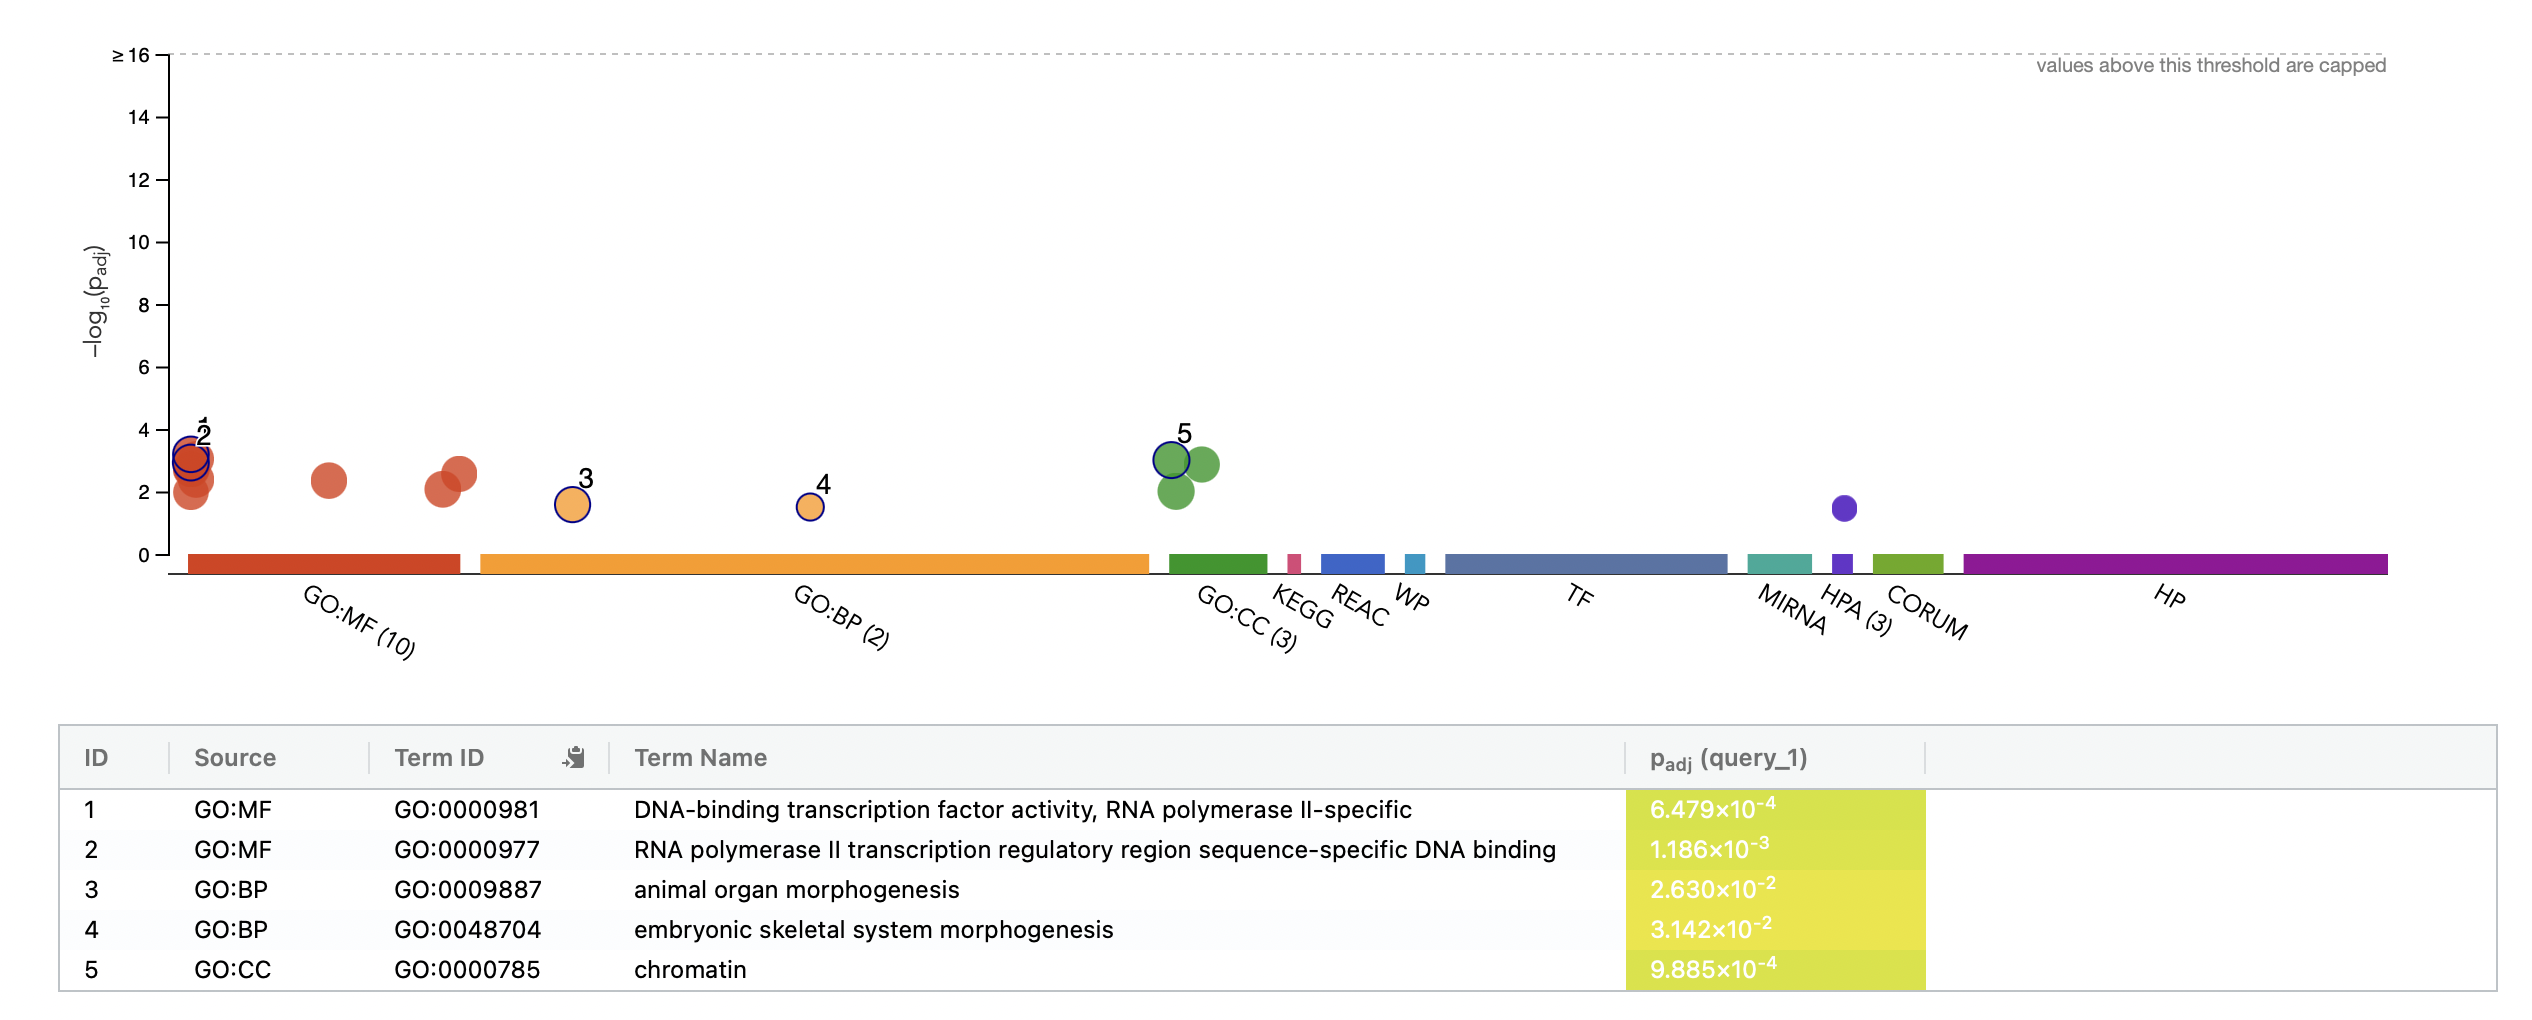

The most enriched pathways have to do with the downregulation of transcription factor binding to DNA as well as binding to transcription regulatory regions in general. This possibly signifies the downregulation of various different genes.

The next enriched pathways are related to morphogenesis, which is possibly caused by the fact that the cells used for this RNA-seq experiment are iPSC-derived developmental glutamatergic neurons.

**In humanmine.org, some of the downregulated genes are shown to interact with ion channel-related genes (shown in the 'Participant 2 Symbol' column):**
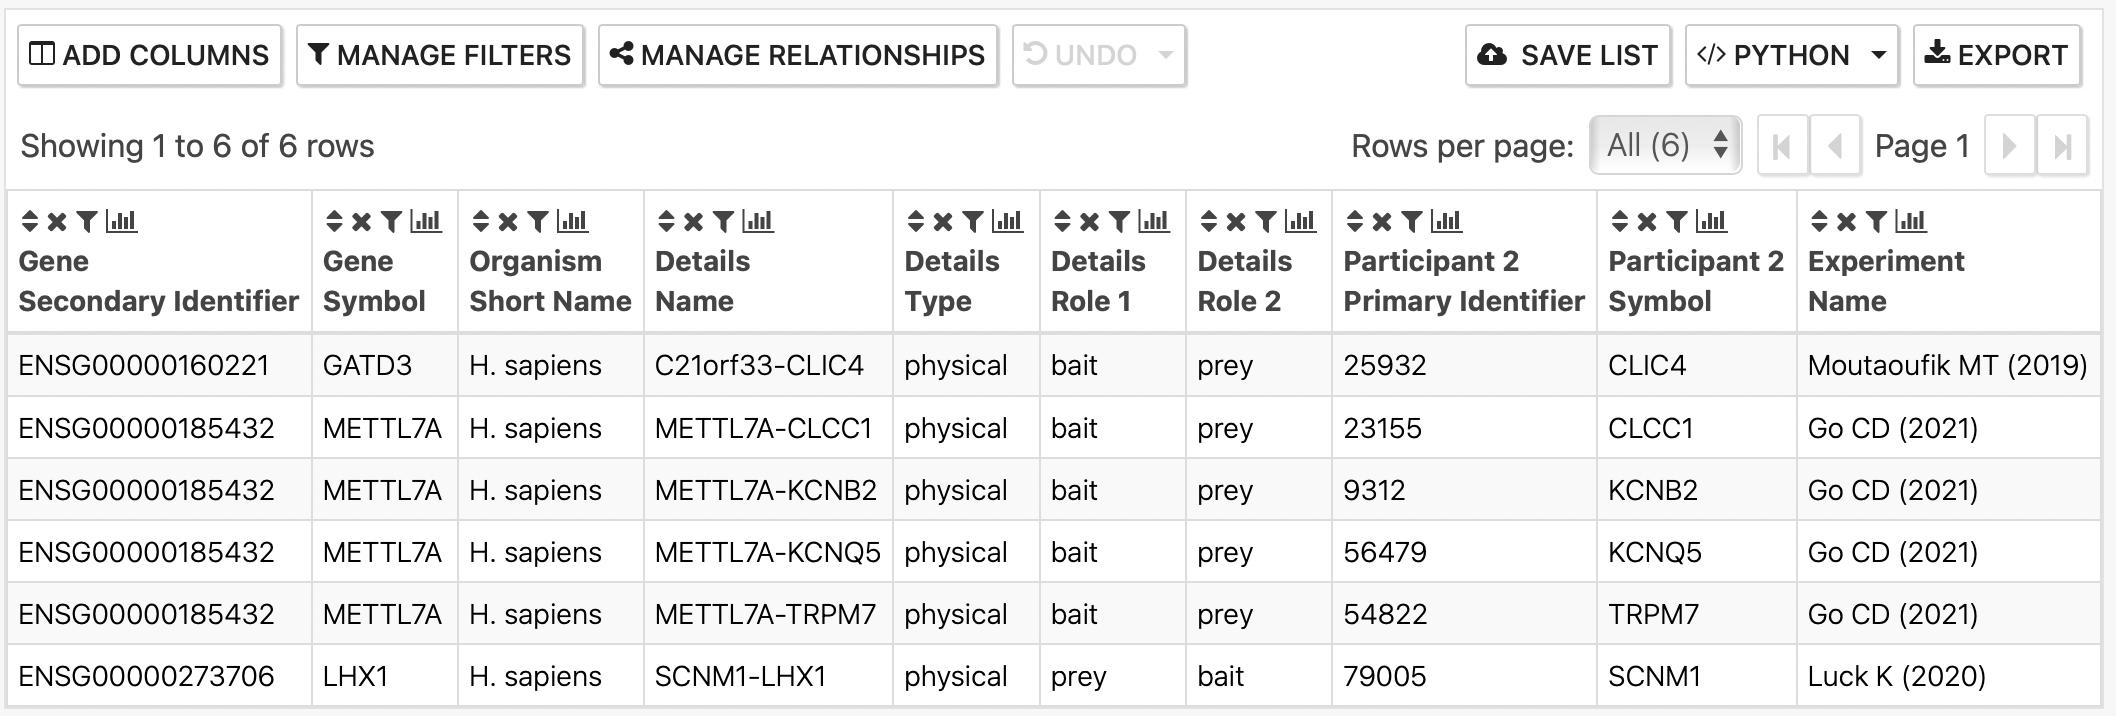
CLIC4: chloride intracellular channel 4  
CLCC1: chloride channel CLIC like 1  
KCNB2: potassium voltage-gated channel subfamily B member 2  
KCNQ5: potassium voltage-gated channel subfamily Q member 5  
TRPM7: transient receptor potential cation channel subfamily M member 7   
SCNM1: sodium channel modifier 1  

Most of these genes interact with METTL7A (or TMT1A), which is predicted to enable methyltranferase activity and involved in methylation. It was shown that "DNA methylation by TMT1A promote osteogenic and odontogenic differentiation by upregulating expression of genes that promote differentiation and survival" ([source](https://www.genecards.org/cgi-bin/carddisp.pl?gene=TMT1A&keywords=METTL7A)). This gene might therefore be more related to the iPSC differentiation than schizophrenia.

# Remarks and conclusions

In this bulk RNA-seq analysis, the mapping algorithm used is **STAR** and the read-counting algorithm used is **featureCounts**. In the reference paper, however, the authors used **Kallisto** to pseudo-align the reads to the hg38 reference transcriptome and quantify the gene transcript abundances. Differential expression analysis was then done using DESeq2, which is the same with what was done here.

This difference in alignment and count algorithms may be the main reason why the analysis results are very different from that of the reference.

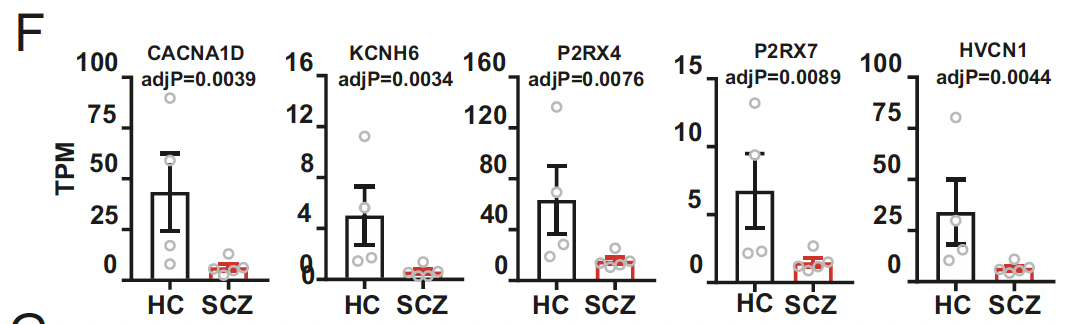

As seen from the figure above obtained from the reference paper, the genes involved in the ion channel pathway are downregulated in schizophrenia (SCZ) cells compared to healthy controls (HC), as seen from their TPM (Transcripts per Kilobase Million) levels. The difference in TPM is significant with padj<0.01.

Another possible reason for this discrepancy of results might be because I analyzed 3 out of 4 controls and 3 out of 5 schizophrenia iPSCs. Extra information from other samples may change the results.

Therefore, the results of my analysis are not very conclusive, since it is not clear what the downregulated genes are collectively involved in. Query to humanmine.org does not show any pathways or GO terms enriched, and query to gProfiler also gave rather vague and not very significant GO term enrichment. It will be interesting to try mapping and counting using Kallisto to see how the results will differ.